In [1]:
setwd("C:/Users/rohan/Jupyter Projects/MSEF/FinalWorkingSpace")
#This is where all my data set, results etc go.
library(tidyverse)
library(readxl)
library(dplyr)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
getcolids <- function(df, collabels){
    col_labels <- colnames(df)
    colids = which(col_labels %in% collabels)
    return(colids)
}
getUniqRows <- function(df, collabs){
# function to take in a data frame and two or more columns that you want to pull a combination of uniq values and get one row each of the data frame for each of the unique values.
    colids <- getcolids(df, collabs)
    newvar <- apply(df[,colids], 1, paste, collapse = "_")
    ord = order(newvar);
    tvar = newvar[ord]
    tvar2 = tvar
    tvar2[2:length(tvar2)] = tvar[1:length(tvar)-1]
    tvar2[1] = 0
    idx = which((tvar2 == tvar) == 0)
    return(df[ord[idx],])
}

getCounts <- function(df, collabs){
    tab <- table(df[,collabs])
    tab[(tab != 0)] = 1
    res <- apply(tab, 2, sum)
    return(res)
}

setDataType <- function(df, numcols, facCols){
    for (col in numcols){
        temp <- unlist(df[,col])
        df[,col] <- as.numeric(temp)
    }
    for (col in facCols){
        temp <- unlist(df[,col])
#        print(class(df[,col]))
        df[,col] <- as.factor(temp)    
    }
    return(df)
}
createSummaryStats <- function(df){
    print(dim(df))
    for (col in colnames(df)) {
        temp <- unlist(df[,col])
        print(paste(c(col, class(temp)), sep = " "))
        if (class(temp) == "character"){
            vals = length(unique(temp))
            print(paste(c("unique values", vals), sep = " "))
        }else {
            print(summary(temp))
        }
    }
}
    

colorsGray = c("gray90", "gray70", "gray50", "grey30", "grey10","slategray","darkslategrey")
colors4plots = c("coral", "chartreuse3", "cadetblue3", "deepskyblue2", "darkorchid1", "goldenrod2", "magenta1", "tan4", "lightslateblue", "gray70")


In [3]:
dat <- read_excel("MSEF_data2_20210907.xlsx", sheet = "ParticipantLevel", na = "NA")

In [4]:
dim(dat)
head(dat)
colnames(dat)

[1] 2928   65

sno,Year,Title,cleanTitle,uniq_project_title,ProjectID3,uniqProjectID,multischool_project,ProjectApproach,class_ontology,...,American_Indian%,Pacific_Islander%,Two_or_more_races%,WhitePercInMSEF,BlackPercInMSEF,HispanicPercInMSEF,AsianPercInMSEF,SchoolDiversity,MSEFDiversity,DeviationEthnicityRep
900,2016,Do All Store Bought Yogurts Have Good Bacteria?,do all store bought yogurts have good bacteria,1,632,1,NA,a,NA,...,0.005,0.002,0.019,0.0000000,0.0000000,1.0000000,0,-0.4003085,0.0000000,0.31478600
529,2015,Algae to Green Diesel,algae to green diesel,1,201,1,NA,m,NA,...,0.003,0.000,0.022,0.0000000,0.0000000,0.0000000,1,-0.3829768,0.0000000,1.47505100
1956,2019,Devel of Bdelloid Rotifers As Experimental Model For Cell Rejuvenation,devel of bdelloid rotifers as experimental model for cell rejuvenation,2,584,2,NA,a,NA,...,0.000,0.005,0.012,0.1111111,0.6666667,0.1111111,0,-0.3368587,-0.3294481,0.02741558
1957,2019,Devel of Bdelloid Rotifers As Experimental Model For Cell Rejuvenation,devel of bdelloid rotifers as experimental model for cell rejuvenation,3,584,3,NA,a,NA,...,0.000,0.005,0.012,0.1111111,0.6666667,0.1111111,0,-0.3368587,-0.3294481,0.02741558
1995,2019,Food Waste At The Burke,food waste at the burke,1,917,1,NA,a,"location,",...,0.000,0.005,0.012,0.1111111,0.6666667,0.1111111,0,-0.3368587,-0.3294481,0.02741558
1996,2019,Food Waste At The Burke,food waste at the burke,2,917,2,NA,a,NA,...,0.000,0.005,0.012,0.1111111,0.6666667,0.1111111,0,-0.3368587,-0.3294481,0.02741558


[1] "sno"                              "Year"                            
 [3] "Title"                            "cleanTitle"                      
 [5] "uniq_project_title"               "ProjectID3"                      
 [7] "uniqProjectID"                    "multischool_project"             
 [9] "ProjectApproach"                  "class_ontology"                  
[11] "Field"                            "AppliedTo"                       
[13] "AppliedValue"                     "ProjectField"                    
[15] "Cancer"                           "AI_ML"                           
[17] "InfectiousDiseases_Covid"         "Category"                        
[19] "SchoolName"                       "school_id"                       
[21] "school_region"                    "zip"                             
[23] "gender"                           "grade"                           
[25] "award"                            "awardvalue"                      
[27] "Ethnicity"                        "Race"                            
[29] "PerfBySchoolByYr"                 "RacePercBySchoolAllYears"        
[31] "TotalStudentParticipatedAllYears" "StudentsByYearBySchool"          
[33] "AllGender"                        "AllGrade"                        
[35] "AllEthnicity"                     "GenderComp"                      
[37] "AvgGrade"                         "EthnicityComp"                   
[39] "team_size"                        "award_value"                     
[41] "Total_awardValue"                 "TotalProjectFromSchoolAllYears"  
[43] "NumberOfYearsParticipated"        "2019Score"                       
[45] "2019SchoolRank"                   "2018Rank"                        
[47] "isCharter"                        "isTitle1"                        
[49] "NumStudents"                      "NumTeachers"                     
[51] "SpendingPerPupil"                 "White%"                          
[53] "Black%"                           "Hispanic%"                       
[55] "Asian%"                           "American_Indian%"                
[57] "Pacific_Islander%"                "Two_or_more_races%"              
[59] "WhitePercInMSEF"                  "BlackPercInMSEF"                 
[61] "HispanicPercInMSEF"               "AsianPercInMSEF"                 
[63] "SchoolDiversity"                  "MSEFDiversity"                   
[65] "DeviationEthnicityRep"

In [5]:
numericcols <- c("AppliedValue", "AvgGrade", "team_size","award_value","Total_awardValue","TotalProjectFromSchoolAllYears","NumberOfYearsParticipated","2019Score","2019SchoolRank","2018Rank","NumStudents","NumTeachers","SpendingPerPupil","White%","Black%","Hispanic%","Asian%","American_Indian%","Pacific_Islander%", "Two_or_more_races%")
factorcols <- c("Year","ProjectID3","uniqProjectID","multischool_project","ProjectApproach","Field", "AppliedTo","ProjectField","Cancer","AI_ML","InfectiousDiseases_Covid","Category","school_id","gender","grade","award","Ethnicity","AllGender","AllGrade","AllEthnicity","GenderComp","EthnicityComp","isCharter","isTitle1")
dat <- setDataType(dat, numericcols, factorcols)
str(dat)

Classes 'tbl_df', 'tbl' and 'data.frame':	2928 obs. of  65 variables:
 $ sno                             : num  900 529 1956 1957 1995 ...
 $ Year                            : Factor w/ 8 levels "2014","2015",..: 3 2 6 6 6 6 6 6 6 6 ...
 $ Title                           : chr  "Do All Store Bought Yogurts Have Good Bacteria?" "Algae to Green Diesel" "Devel of Bdelloid Rotifers As Experimental Model For Cell Rejuvenation" "Devel of Bdelloid Rotifers As Experimental Model For Cell Rejuvenation" ...
 $ cleanTitle                      : chr  "do all store bought yogurts have good bacteria" "algae to green diesel" "devel of bdelloid rotifers as experimental model for cell rejuvenation" "devel of bdelloid rotifers as experimental model for cell rejuvenation" ...
 $ uniq_project_title              : num  1 1 2 3 1 2 3 1 2 3 ...
 $ ProjectID3                      : Factor w/ 2262 levels "1","2","3","4",..: 632 201 584 584 917 917 917 1980 1980 1980 ...
 $ uniqProjectID                   : Fac

In [6]:
createSummaryStats(dat)
table(dat$Year, dat$gender)

[1] 2928   65
[1] "sno"     "numeric"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   735.8  1473.5  1473.5  2209.2  2950.0 
[1] "Year"   "factor"
2014 2015 2016 2017 2018 2019 2020 2021 
 393  387  386  378  375  364  330  315 
[1] "Title"     "character"
[1] "unique values" "2328"         
[1] "cleanTitle" "character" 
[1] "unique values" "2309"         
[1] "uniq_project_title" "numeric"           
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.251   1.000   8.000 
[1] "ProjectID3" "factor"    
    561     192     300     302     338     415     878     908    1119    1151 
      8       6       4       4       4       4       4       4       4       4 
   1193    1602       6      75     120     162     168     189     191     240 
      4       4       3       3       3       3       3       3       3       3 
    282     308     317     357     359     369     435     452     467     522 
      3       3       3       3       3       3    

      
         F   M   X
  2014 186 186  21
  2015 192 171  24
  2016 187 167  32
  2017 203 151  24
  2018 178 165  32
  2019 199 131  34
  2020 197 131   2
  2021   0   0 315

In [7]:
#sub data sets to create"
# 1. rows = all individual particpants for all years: 2928 rows X 47 columns (as read from excel file)
# 2. rows = all unique projects by each year
projDat <- getUniqRows(dat, c("Year", "ProjectID3"))
award2 <- as.character(unlist(projDat[,"award"]))
award2[which(projDat[,"award"] == "First")] = "award"
award2[which(projDat[,"award"] == "Second")] = "award"
award2[which(projDat[,"award"] == "Third")] = "award"
projDat <- cbind(projDat,award2)

# 3. rows = all unique schools by each year
schoolDat <- getUniqRows(dat, c("Year", "school_id"))
schoolDat[,53] <- is.na(schoolDat$NumStudents)

In [8]:
colnames(schoolDat)[colnames(schoolDat)=="2019Score"] <- "Score2019"
colnames(schoolDat)

[1] "sno"                              "Year"                            
 [3] "Title"                            "cleanTitle"                      
 [5] "uniq_project_title"               "ProjectID3"                      
 [7] "uniqProjectID"                    "multischool_project"             
 [9] "ProjectApproach"                  "class_ontology"                  
[11] "Field"                            "AppliedTo"                       
[13] "AppliedValue"                     "ProjectField"                    
[15] "Cancer"                           "AI_ML"                           
[17] "InfectiousDiseases_Covid"         "Category"                        
[19] "SchoolName"                       "school_id"                       
[21] "school_region"                    "zip"                             
[23] "gender"                           "grade"                           
[25] "award"                            "awardvalue"                      
[27] "Ethnicity"                        "Race"                            
[29] "PerfBySchoolByYr"                 "RacePercBySchoolAllYears"        
[31] "TotalStudentParticipatedAllYears" "StudentsByYearBySchool"          
[33] "AllGender"                        "AllGrade"                        
[35] "AllEthnicity"                     "GenderComp"                      
[37] "AvgGrade"                         "EthnicityComp"                   
[39] "team_size"                        "award_value"                     
[41] "Total_awardValue"                 "TotalProjectFromSchoolAllYears"  
[43] "NumberOfYearsParticipated"        "Score2019"                       
[45] "2019SchoolRank"                   "2018Rank"                        
[47] "isCharter"                        "isTitle1"                        
[49] "NumStudents"                      "NumTeachers"                     
[51] "SpendingPerPupil"                 "White%"                          
[53] "Black%"                           "Hispanic%"                       
[55] "Asian%"                           "American_Indian%"                
[57] "Pacific_Islander%"                "Two_or_more_races%"              
[59] "WhitePercInMSEF"                  "BlackPercInMSEF"                 
[61] "HispanicPercInMSEF"               "AsianPercInMSEF"                 
[63] "SchoolDiversity"                  "MSEFDiversity"                   
[65] "DeviationEthnicityRep"

In [9]:
dim(projDat)
dim(schoolDat)
createSummaryStats(projDat)

[1] 2346   66

[1] 614  65

[1] 2346   66
[1] "sno"     "numeric"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   763.2  1508.0  1502.4  2249.8  2950.0 
[1] "Year"   "factor"
2014 2015 2016 2017 2018 2019 2020 2021 
 306  304  314  304  304  293  265  256 
[1] "Title"     "character"
[1] "unique values" "2326"         
[1] "cleanTitle" "character" 
[1] "unique values" "2307"         
[1] "uniq_project_title" "numeric"           
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    1.00    1.07    1.00    7.00 
[1] "ProjectID3" "factor"    
     75     168     192     561    1981    2089      36      47      59     105 
      3       3       3       3       3       3       2       2       2       2 
    123     124     130     133     146     202     211     248     274     300 
      2       2       2       2       2       2       2       2       2       2 
    302     307     308     338     352     357     369     415     435     457 
      2       2       2       2       2       2    

In [10]:
# Plots to make
# Word cloud of the cleaned up text.
# Analysis of general participation and trends in project topics
# 1. bar plot of number of participants by each year (x-axis), stacked by boys and girls : show Chi sq test of homogeniety
# 2. bar plot of number of participants by each year (x-axis), stacked by grade : show Chi sq test of homogeniety 
# 2b. bar plot of number of participants by each year (x-axis), stacked by Ethnicity : show Chi sq test of homogeniety 
# 3. bar plot of number of projects (uniq projectID3) in each year, stacked by category of the project
# 4. bar plot of number of projects in each category stacked by gender Composition: show Chi sq test of homogeniety
# 5. bar plot of number of projects in each category stacked by grade composition
# 6. bar plot of number of projects in each category stacked by ethnicity make up: show Chi sq test of homogeniety
# 7. bar plot of number of cancer projects by year (x-axis): show Chi sq test of homogeniety
# 8. bar plot of number of AI/ML projects by year (x-axis): show Chi sq test of homogeniety
# 9. bar plot of number of Infectious Disease projects by year (x-axis) :show Chi sq test of homogeniety

# Analysis of the performance (probability of winning an award)
# 10. bar plot of number of projects by category (x-axis) and stacked by award (1,2,3) or no-award (HM and NA)
# 11. bar plot of number of projects by cancer vs non, (x-axis) stacked by award or no award. :test of proportions
# 12. bar plot of number of projects by AI/ML vs non, (x-axis) stacked by award or no award.: test of proportions
# 13. bar plot of number of projects by Infectious Diseases vs non, (x-axis) stacked by award or no award.: test of proportions
# 14. bar plot of number of projects by Gender comp, (x-axis) stacked by award or no award.: test of proportions
# 15. bar plot of number of projects by grade Comp, (x-axis) stacked by award or no award.: show Chi sq test of homogeniety
# 16. bar plot of number of projects by Ethnicity Comp, (x-axis) stacked by award or no award. :show Chi sq test of homogeniety
# 16.5 plot of applied vs fundamental projects

# Analysis of the School level attributes in participation and performance
# 17. bar plot of number of schools participating by year (x-axis), stacked by private/public schools.
# 18. histogram of the number of projects (binned 0-2, 2-5, 5-10, 10-15, 15-20, 20+) from each school (x-axis), and the number of schools... i.e most schools would have 2-3 projects, few schools would have 10-15 entries.
# 19. scatterplot of school participation (# of projects) vs student size
# 20. scatterplot of school participation (# of projects) vs funding
# 21. scatterplot of school participation vs school rank (2019 or 2018 or avg rank)
# 22. scatterplot of school size vs performance score
# 23. scatterplot of school funding vs performance score
# 24. scatterplot of school rank (avg of 2019, 2018) vs performance score

# 25. clustering (dendrogram) of projects by words, etc.
# 26. clustering of schools in PC space

cols4counts <- c("Year","ProjectField","Cancer","AI_ML","InfectiousDiseases_Covid","Category","school_id","gender","grade","award","Ethnicity","AllGender","AllGrade","AllEthnicity","GenderComp","EthnicityComp","isCharter","isTitle1")

      gender
Year     F   M   X
  2014 186 186  21
  2015 192 171  24
  2016 187 167  32
  2017 203 151  24
  2018 178 165  32
  2019 199 131  34
  2020 197 131   2
  2021   0   0 315

[1] 8 3

[1] 2928


	Pearson's Chi-squared test

data:  table(dat[, c("Year", "gender")])[c(1:7), c(1, 2)]
X-squared = 14.339, df = 6, p-value = 0.02607


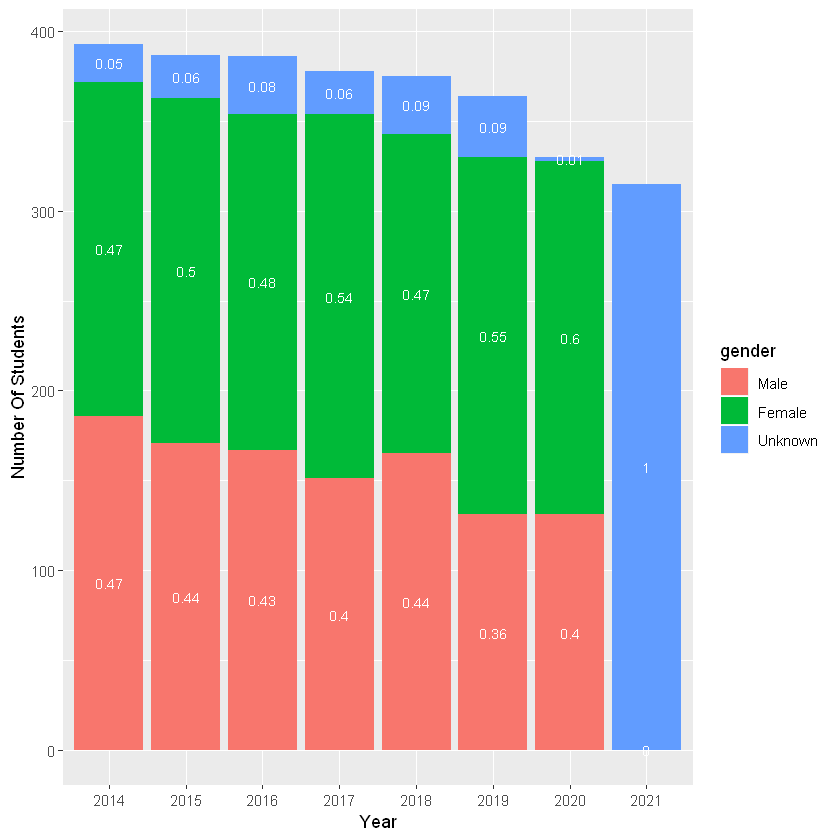

In [11]:
# 1. bar plot of number of participants by each year (x-axis), stacked by boys and girls : show Chi sq test of homogeniety
tab <- table(dat[,c("Year", "gender")])
tab

dim(tab)
sum(tab)

chisq.test(table(dat[,c("Year", "gender")])[c(1:7),c(1,2)])
t <- as.data.frame(tab)
t$gender <- factor(t$gender, levels=c("Male", "Female", "Unknown", "F", "M", "X"))
t$gender[which(t$gender == "X")] <- "Unknown"
t$gender[which(t$gender == "M")] <- "Male"
t$gender[which(t$gender == "F")] <- "Female"
perc <- as.data.frame(round(tab/apply(tab, 1, sum),2))
t <- cbind(t,perc[,3])
colnames(t)[4] <- "percentage"

g <- ggplot(data = t, aes(x = Year, y = Freq, fill = gender))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
# g <- g + scale_fill_manual(values = colorsGray[c(4,3,2)])
g <- g + geom_text(aes(label=percentage), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
# g <- g + labs(title = "Student Participation in Science Fair by Gender", caption = "Fig 1.0: Percentages Shown in bar, Gender breakdown for 2021 unavailable")
g <- g + labs(x = "Year", y = "Number Of Students")
g

      grade
Year   10th 11th 12th 9th   X
  2014  124  116   79  53  21
  2015  127  119   79  38  24
  2016  124  113   55  62  32
  2017  124  103   46  85  20
  2018   87  137   72  47  32
  2019   91  120   57  65  31
  2020  120  107   40  63   0
  2021   78  142   41  54   0


	Pearson's Chi-squared test

data:  table(dat[, c("Year", "grade")])[c(1:7), c(1:4)]
X-squared = 64.678, df = 18, p-value = 3.514e-07


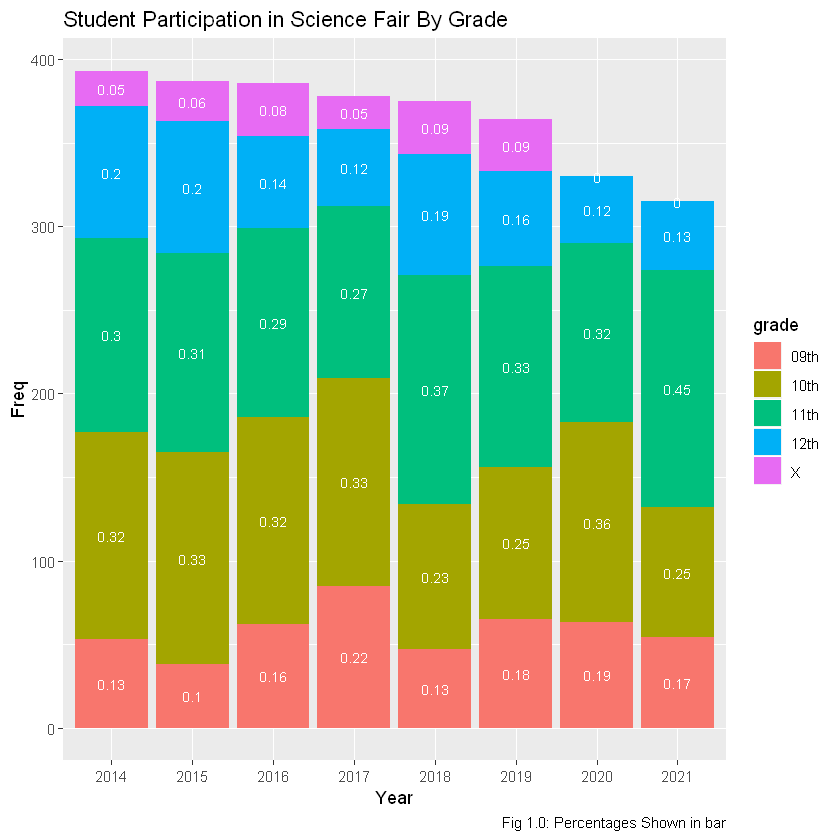

In [37]:
# 2. bar plot of number of participants by each year (x-axis), stacked by grade : show Chi sq test of homogeniety 
tab <- table(dat[,c("Year", "grade")])
tab
chisq.test(table(dat[,c("Year", "grade")])[c(1:7),c(1:4)])
#barplot(table(dat[,c("grade", "Year")]), legend = T)

t <- as.data.frame(tab)
#t
perc <- as.data.frame(round(tab/apply(tab, 1, sum),2))
t <- cbind(t,perc[,3])
t$grade <- as.character(t$grade)
t$grade[which(t$grade == "9th")] = "09th"
colnames(t)[4] <- "percentage"

g <- ggplot(data = t, aes(x = Year, y = Freq, fill = grade))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
# g <- g + scale_fill_manual(values = colorsGray[c(6,7,4,3,2)])
g <- g + geom_text(aes(label=percentage), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
g <- g + labs(title = "Student Participation in Science Fair By Grade", caption = "Fig 1.0: Percentages Shown in bar")
g



      Ethnicity
Year   African Asian Biracial Caucasian Latino Native American Other SouthAsian
  2014      16    77        4       197     15               0    30         33
  2015      14    71        6       199     17               0    23         33
  2016      15    64        6       188     23               0    20         38
  2017      36    59        3       161     24               2    28         45
  2018      25    67        3       149     34               3    14         48
  2019      30    58        4       146     23               0    17         55
  2020      15    77        6       123     28               0    18         63
  2021       0     0        0         0      0               0     0          1

[1] 8 8

[1] 2454


	Pearson's Chi-squared test

data:  table(dat[, c("Year", "Ethnicity")])[c(1:7), c(1, 2, 4, 5, 8)]
X-squared = 83.348, df = 24, p-value = 1.766e-08


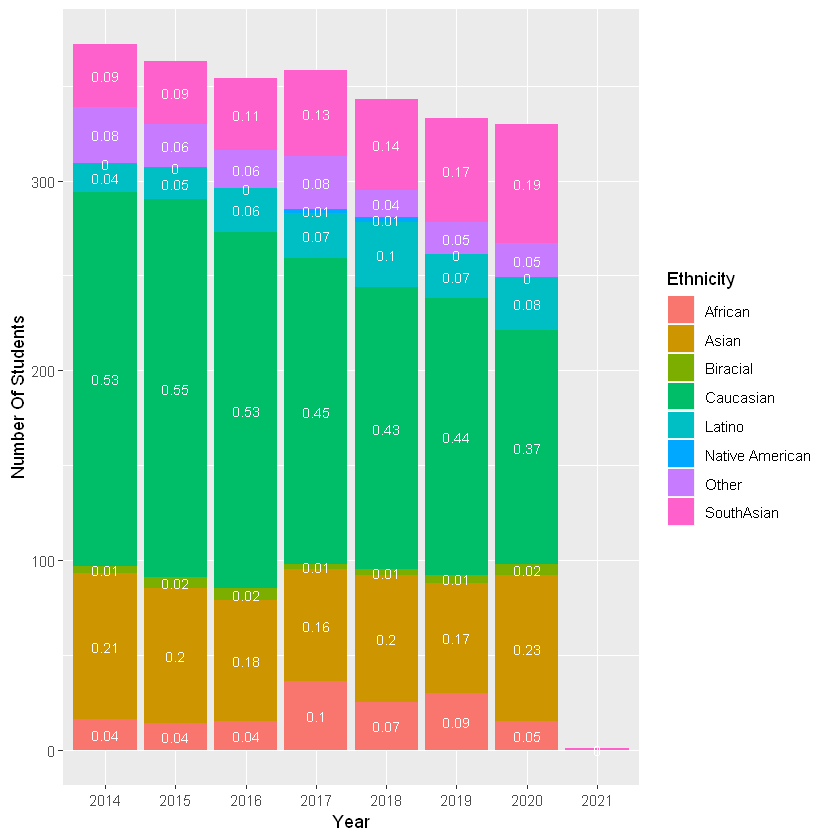

In [29]:
# 2b. bar plot of number of participants by each year (x-axis), stacked by ethnicity : show Chi sq test of homogeniety 
tab <- table(dat[,c("Year", "Ethnicity")])
tab

dim(tab)
sum(tab)

chisq.test(table(dat[,c("Year", "Ethnicity")])[c(1:7),c(1,2,4,5,8)])

t <- as.data.frame(tab)
#t
perc <- as.data.frame(round(tab/apply(tab, 1, sum),2))
t <- cbind(t,perc[,3])
colnames(t)[4] <- "percentage"

g <- ggplot(data = t, aes(x = Year, y = Freq, fill = Ethnicity))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
# g <- g + scale_fill_manual(values = colors4plots[1:10])
g <- g + geom_text(aes(label=percentage), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
# g <- g + labs(title = "Student Participation in Science Fair By Ethnicity", caption = "Fig 1.0: Percentages Shown in bar")
g <- g + labs(x = "Year", y = "Number Of Students")
g

      ProjectField
Year   BehavioralAndSocial biology Chemistry ComputerSci Engineering
  2014                  16     112        23           6          76
  2015                  13     118        24          13          73
  2016                  25      90        27           8          81
  2017                  17     119        23          11          71
  2018                  21      99        21          37          67
  2019                  16     111        20          27          61
  2020                  11      87        17          29          61
  2021                  19      83        17          47          46
      ProjectField
Year   environment Math Physics
  2014          60    6       7
  2015          49    6       8
  2016          66   10       7
  2017          49    5       9
  2018          47    2      10
  2019          43    6       9
  2020          50    6       4
  2021          32    5       7

[1] 8 8

[1] 2346


	Pearson's Chi-squared test

data:  table(dat[, c("Year", "ProjectField")])
X-squared = 163.7, df = 49, p-value = 2.837e-14


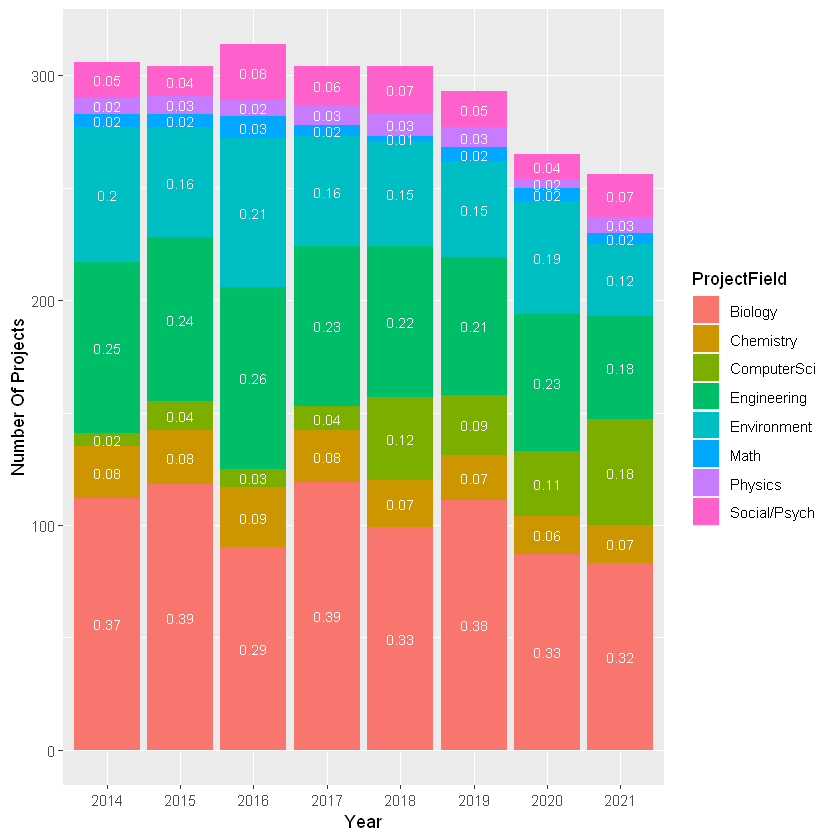

In [34]:
# 3. bar plot of number of projects (uniq projectID3) in each year, stacked by category of the project
tab <- table(projDat[,c("Year", "ProjectField")])
tab

dim(tab)
sum(tab)

chisq.test(table(dat[,c("Year", "ProjectField")]))
#barplot(table(dat[,c("ProjectField", "Year")]), legend = T, col = c("red", "blue", "green", "gray", "black", "orange"))
t <- as.data.frame(tab)
t$ProjectField <- factor(t$ProjectField, levels=c("Biology", "Chemistry", "ComputerSci", "Engineering", "Environment", "Math", "Physics", "Social/Psych", "environment", "BehavioralAndSocial", "biology"))
t$ProjectField[which(t$ProjectField == "BehavioralAndSocial")] <- "Social/Psych"
t$ProjectField[which(t$ProjectField == "biology")] <- "Biology"
t$ProjectField[which(t$ProjectField == "environment")] <- "Environment"

perc <- as.data.frame(round(tab/apply(tab, 1, sum),2))
t <- cbind(t,perc[,3])
colnames(t)[4] <- "percentage"

g <- ggplot(data = t, aes(x = Year, y = Freq, fill = ProjectField))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
# g <- g + scale_fill_manual(values = colors4plots[1:8])
g <- g + geom_text(aes(label=percentage), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
# g <- g + labs(title = "Student Participation in Science Fair By area of research", caption = "Fig 1.0: Percentages Shown in bar")
g <- g + labs(x = "Year", y = "Number Of Projects")
g


          ProjectField
GenderComp BehavioralAndSocial biology Chemistry ComputerSci Engineering
      AllF                  76     439        77          30         165
      AllM                  29     206        57          92         275
      Mix                    4      35         7           1          17
      X                     29     139        31          55          79
          ProjectField
GenderComp environment Math Physics
      AllF         218    9      23
      AllM         105   24      21
      Mix           15    0       0
      X             58   13      17

[1] 4 8

[1] 2346


	Pearson's Chi-squared test

data:  table(dat[, c("GenderComp", "ProjectField")])[c(1:2), c(1, 3,     4, 5, 6)]
X-squared = 160.91, df = 4, p-value < 2.2e-16


          ProjectField
GenderComp BehavioralAndSocial biology Chemistry ComputerSci Engineering
      AllF                0.07    0.42      0.07        0.03        0.16
      AllM                0.04    0.25      0.07        0.11        0.34
      Mix                 0.05    0.44      0.09        0.01        0.22
      X                   0.07    0.33      0.07        0.13        0.19
          ProjectField
GenderComp environment Math Physics
      AllF        0.21 0.01    0.02
      AllM        0.13 0.03    0.03
      Mix         0.19 0.00    0.00
      X           0.14 0.03    0.04

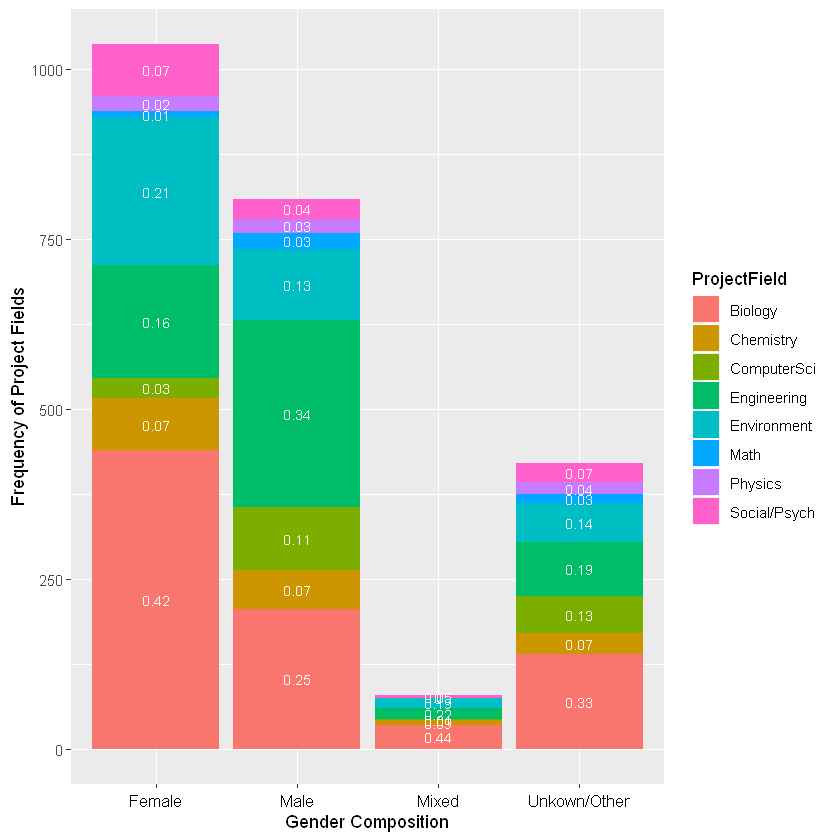

In [50]:
# 4. bar plot of number of projects in each category stacked by gender Composition: show Chi sq test of homogeniety
tab <- table(projDat[,c("GenderComp","ProjectField")])
tab

dim(tab)
sum(tab)

chisq.test(table(dat[,c("GenderComp", "ProjectField")])[c(1:2), c(1,3,4,5,6)])
#barplot(table(dat[,c("ProjectField", "GenderComp")]), legend = T, col = c("red", "blue", "green", "gray", "black", "orange"))
perc <- round(tab/apply(tab, 1, sum),2)
perc
perc <- as.data.frame(perc)
t <- as.data.frame(tab)
t$ProjectField <- factor(t$ProjectField, levels=c("Biology", "Chemistry", "ComputerSci", "Engineering", "Environment", "Math", "Physics", "Social/Psych", "environment", "BehavioralAndSocial", "biology"))
t$ProjectField[which(t$ProjectField == "BehavioralAndSocial")] <- "Social/Psych"
t$ProjectField[which(t$ProjectField == "biology")] <- "Biology"
t$ProjectField[which(t$ProjectField == "environment")] <- "Environment"

t$GenderComp <- factor(t$GenderComp, levels=c("Female", "Male", "Mixed", "Unkown/Other", "AllM", "AllF", "Mix", "X"))
t$GenderComp[which(t$GenderComp == "AllM")] <- "Male"
t$GenderComp[which(t$GenderComp == "AllF")] <- "Female"
t$GenderComp[which(t$GenderComp == "Mix")] <- "Mixed"
t$GenderComp[which(t$GenderComp == "X")] <- "Unkown/Other"
t <- cbind(t,perc[,3])
colnames(t)[4] <- "percentage"

g <- ggplot(data = t, aes(x = GenderComp , y = Freq, fill = ProjectField))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
# g <- g + scale_fill_manual(values = colors4plots[1:8])
g <- g + geom_text(aes(label=percentage), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
# g <- g + labs(title = "Field of research and Gender of Participants", caption = "Fig 1.0: Percentages Shown in bar")
g <- g + theme(axis.text.x=element_text(color = "black", size=10, angle=0, vjust=0.8, hjust=0.5))
g <- g + labs(x = "Gender Composition", y = "Frequency of Project Fields")
g

# check for ggplot xaxis labels orientation and change it.




In [ ]:
# 4b. bar plot of category by participant gender: show Chi sq test of homogeniety

    
     BehavioralAndSocial biology Chemistry ComputerSci Engineering environment
  9                   23     108        26          26          92          77
  10                  37     258        63          50         180         115
  11                  46     259        50          81         141         128
  12                  22     140        19          14          92          50
    
     Math Physics
  9     3      11
  10    7      17
  11   15      17
  12   13       6

[1] 4 8


	Pearson's Chi-squared test

data:  table(dat[, c("AvgGrade", "ProjectField")])[c(1, 5, 9, 13), c(1,     3, 4, 5, 6)]
X-squared = 45.724, df = 12, p-value = 7.74e-06


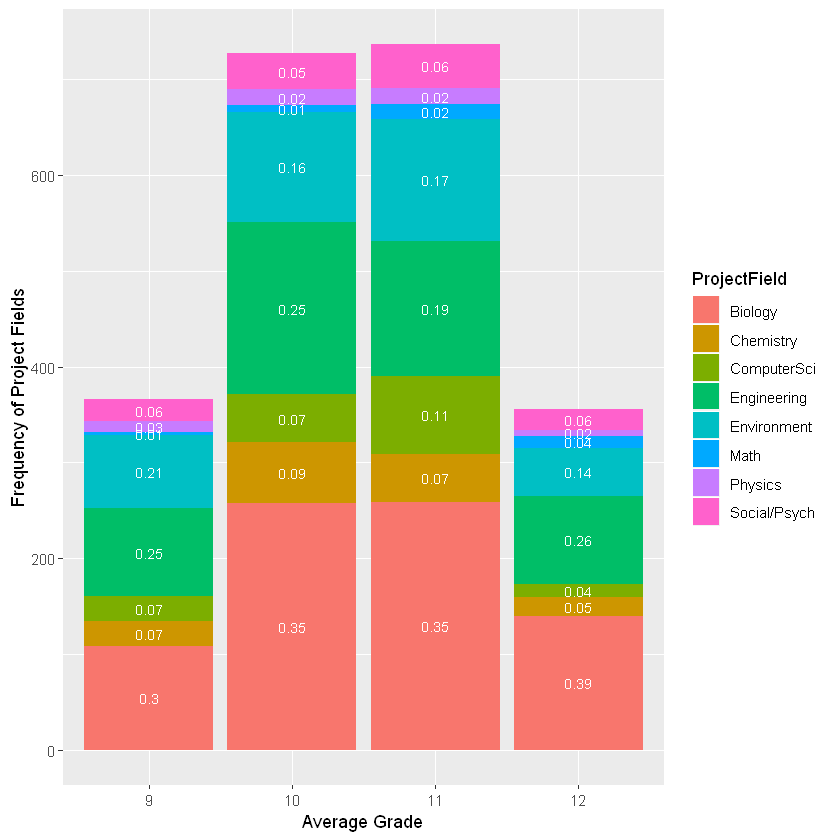

In [58]:
# 5. bar plot of number of projects in each category stacked by grade composition
tab <- table(round(projDat$AvgGrade,0), projDat$ProjectField)
#tab <- table(projDat[,c("AvgGrade", "ProjectField")])
tab
dim(tab)
chisq.test(table(dat[,c("AvgGrade", "ProjectField")])[c(1,5,9,13), c(1,3,4,5,6)])
#barplot(table(dat[,c("ProjectField", "AvgGrade")]), legend = T, col = c("red", "blue", "green", "gray", "black", "orange"))

t <- as.data.frame(tab)
colnames(t) <- c("AvgGrade", "ProjectField", "Freq")
t$ProjectField <- factor(t$ProjectField, levels=c("Biology", "Chemistry", "ComputerSci", "Engineering", "Environment", "Math", "Physics", "Social/Psych", "environment", "BehavioralAndSocial", "biology"))
t$ProjectField[which(t$ProjectField == "BehavioralAndSocial")] <- "Social/Psych"
t$ProjectField[which(t$ProjectField == "biology")] <- "Biology"
t$ProjectField[which(t$ProjectField == "environment")] <- "Environment"
perc <- as.data.frame(round(tab/apply(tab, 1, sum),2))
t <- cbind(t,perc[,3])
colnames(t) <- c("AvgGrade", "ProjectField", "Freq", "percentage")

g <- ggplot(data = t, aes(x = AvgGrade, y = Freq, fill = ProjectField))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
#g <- g + scale_fill_manual(values = colors4plots[1:8])
g <- g + geom_text(aes(label=percentage), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
# g <- g + labs(title = "Field of research and Grade of Participants", caption = "Fig 1.0: Percentages Shown in bar")
g <- g + labs(x = "Average Grade", y = "Frequency of Project Fields")
g

               ProjectField
EthnicityComp   BehavioralAndSocial biology Chemistry ComputerSci Engineering
  1                               0       1         2           0           0
  2                              10      78        15          14          40
  3                               0       4         1           0           5
  AllAsian                       19     135        32          40          62
  AllBiracial                     1       9         2           0           0
  AllBlack                        5      30        11           3          15
  AllLatino                       9      27         8           6           9
  AllSouthAsian                  13      87         8          29          61
  AllWhite                       46     282        54          27         246
  X                              35     166        39          59          98
               ProjectField
EthnicityComp   environment Math Physics
  1                       0    0       0
  2 

[1] 10  8


	Pearson's Chi-squared test

data:  table(dat[, c("EthnicityComp", "ProjectField")])[c(2, 4, 6, 7,     8, 9), c(1, 3, 4, 5, 6)]
X-squared = 139.63, df = 20, p-value < 2.2e-16


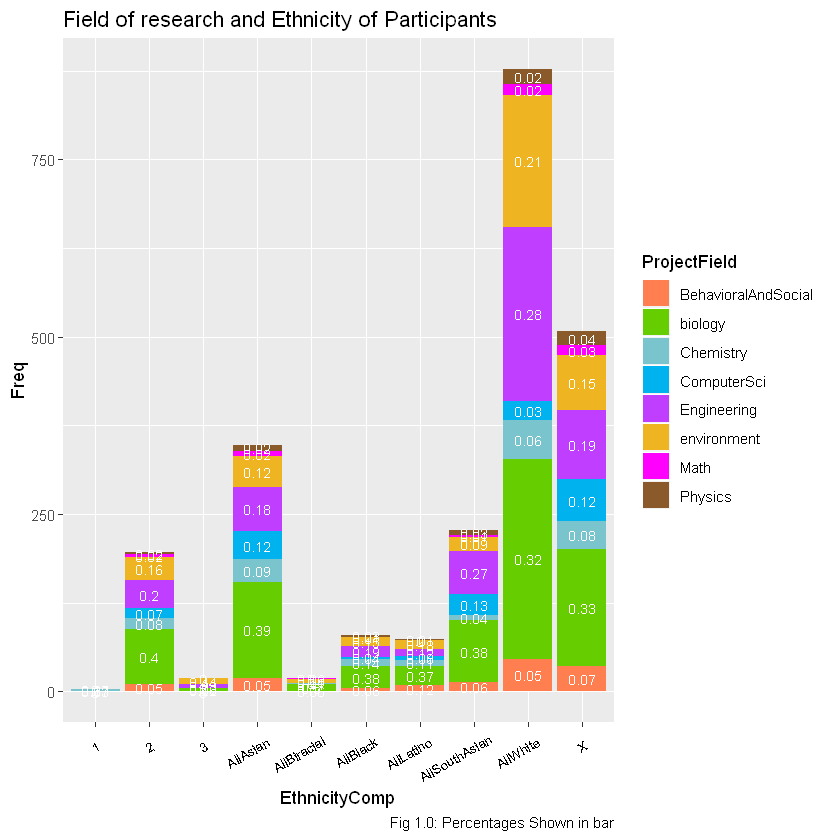

In [132]:
# 6. bar plot of number of projects in each category stacked by ethnicity make up: show Chi sq test of homogeniety
tab <- table(projDat[,c("ProjectField", "EthnicityComp")])
tab <- t(tab)
tab
dim(tab)
chisq.test(table(dat[,c("EthnicityComp", "ProjectField")])[c(2,4,6,7,8,9), c(1,3,4,5,6)])
#barplot(table(dat[,c("ProjectField", "EthnicityComp")]), legend = T, col = c("red", "blue", "green", "gray", "black", "orange"))

t <- as.data.frame(tab)
perc <- as.data.frame(round(tab/apply(tab, 1, sum),2))
t <- cbind(t,perc[,3])
colnames(t)[4] <- "percentage"

g <- ggplot(data = t, aes(x = EthnicityComp , y = Freq, fill = ProjectField))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + scale_fill_manual(values = colors4plots[1:10])
g <- g + geom_text(aes(label=percentage), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
g <- g + labs(title = "Field of research and Ethnicity of Participants", caption = "Fig 1.0: Percentages Shown in bar")
g <- g + theme(axis.text.x=element_text(color = "black", size=8, angle=30, vjust=.8, hjust=0.8))
g




[1] 8 2

[1] 2346

,Year,NumOfProjects,percentage
9,2014,9,0.03
10,2015,5,0.02
11,2016,2,0.01
12,2017,15,0.05
13,2018,5,0.02
14,2019,6,0.02
15,2020,8,0.03
16,2021,12,0.05



	Chi-squared test for given probabilities

data:  t[, 2]
X-squared = 15.935, df = 7, p-value = 0.02571


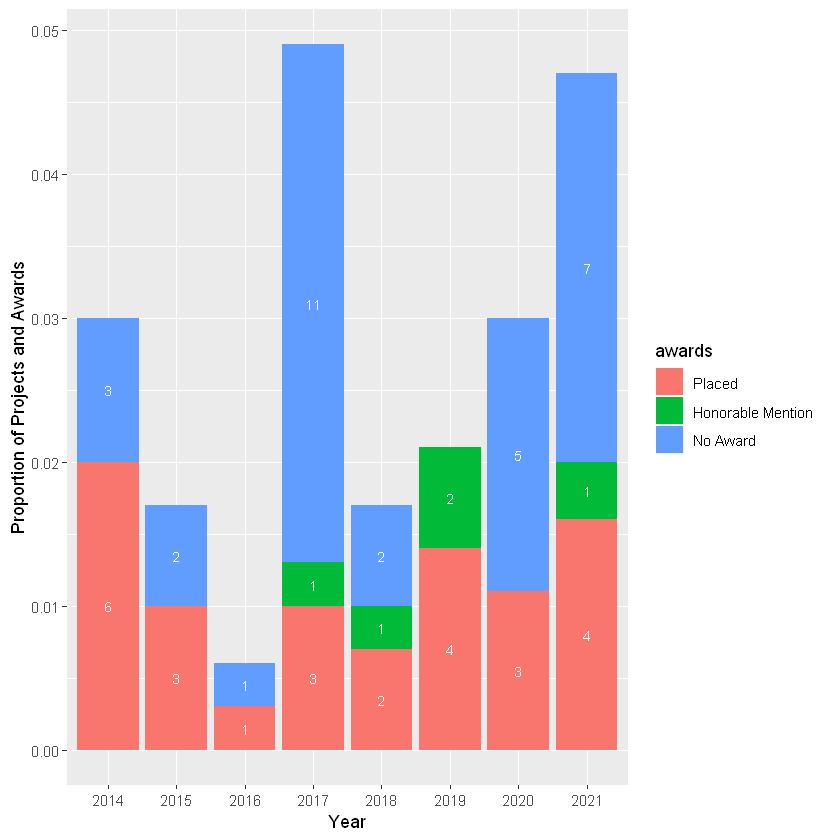

In [39]:
# 7. bar plot of number of cancer projects by year (x-axis): chi-sq test of proportions

tab <- table(projDat[, c("Year","Cancer")])
perc <- as.data.frame(round(tab/apply(tab,1, sum), 2))

dim(tab)
sum(tab)

t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
t <- t[which(t[,2] == 1), c(1,3,4)]
colnames(t) <- c("Year", "NumOfProjects", "percentage")
t
chisq.test(t[,2])

years <- projDat$Year[projDat$Cancer == 1]
awards <- projDat$award2[projDat$Cancer == 1]
awards <- factor(awards)

plot.df <- data.frame(years, awards)
plot.df$awards <- factor(plot.df$awards, levels=c("Placed", "Honorable Mention", "No Award", "award", "HM", "noAward"))
plot.df$awards[which(plot.df$awards == "award")] <- "Placed"
plot.df$awards[which(plot.df$awards == "HM")] <- "Honorable Mention"
plot.df$awards[which(plot.df$awards == "noAward")] <- "No Award"
plot.df <- plot.df %>% group_by(years, awards) %>% tally()
plot.df$freq <- plot.df$n

totalparticipants <- as.data.frame.table(table(projDat$Year))
for(row in 1:length(rownames(plot.df))) {
    plot.df$n[row] <- round(plot.df$n[row]/totalparticipants$Freq[which(totalparticipants$Var1 == plot.df$years[row])],3)
}

ggplot(plot.df, aes(fill=awards, y=n, x=years)) + 
  geom_bar(position= position_stack(reverse = TRUE), stat="identity") + 
  labs(x = "Year", y = "Number Of Projects") +
  geom_text(aes(label=freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3) + 
  # labs(title = "Frequency and Awards of Cancer-Related Projects Over Time", caption = "Frequencies Shown in bar")
  labs(x = "Year", y = "Proportion of Projects and Awards")

[1] 8 2

[1] 2346

,Year,NumOfProjects,percentage
9,2014,1,0.00
10,2015,2,0.01
11,2016,4,0.01
12,2017,2,0.01
13,2018,19,0.06
14,2019,18,0.06
15,2020,11,0.04
16,2021,30,0.12



	Chi-squared test for given probabilities

data:  t[, 2]
X-squared = 72.172, df = 7, p-value = 5.37e-13


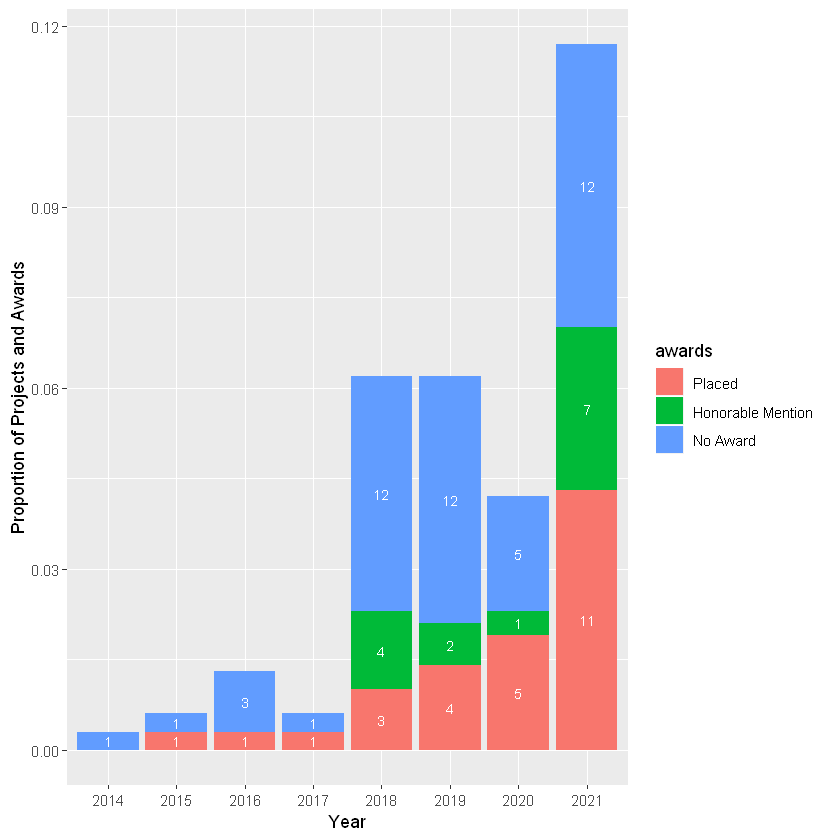

In [40]:
# 8. bar plot of number of AI/ML projects by year (x-axis): show Chi sq test of homogeniety

tab <- table(projDat[, c("Year","AI_ML")])
perc <- as.data.frame(round(tab/apply(tab,1, sum), 2))

dim(tab)
sum(tab)

t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
t <- t[which(t[,2] == 1), c(1,3,4)]
colnames(t) <- c("Year", "NumOfProjects", "percentage")
t
chisq.test(t[,2])

years <- projDat$Year[projDat$AI_ML == 1]
awards <- projDat$award2[projDat$AI_ML == 1]
awards <- factor(awards)

plot.df <- data.frame(years, awards)
plot.df$awards <- factor(plot.df$awards, levels=c("Placed", "Honorable Mention", "No Award", "award", "HM", "noAward"))
plot.df$awards[which(plot.df$awards == "award")] <- "Placed"
plot.df$awards[which(plot.df$awards == "HM")] <- "Honorable Mention"
plot.df$awards[which(plot.df$awards == "noAward")] <- "No Award"
plot.df <- plot.df %>% group_by(years, awards) %>% tally()
plot.df$freq <- plot.df$n

totalparticipants <- as.data.frame.table(table(projDat$Year))
for(row in 1:length(rownames(plot.df))) {
    plot.df$n[row] <- round(plot.df$n[row]/totalparticipants$Freq[which(totalparticipants$Var1 == plot.df$years[row])],3)
}

ggplot(plot.df, aes(fill=awards, y=n, x=years)) + 
  geom_bar(position= position_stack(reverse = TRUE), stat="identity") + 
  labs(x = "Year", y = "Number Of Projects") +
  geom_text(aes(label=freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3) + 
  # labs(title = "Frequency and Awards of AI/ML Projects Over Time", caption = "Frequencies Shown in bar")
  labs(x = "Year", y = "Proportion of Projects and Awards")

[1] 8 2

[1] 2346

,Year,NumOfProjects,percentage
9,2014,18,0.06
10,2015,17,0.06
11,2016,12,0.04
12,2017,18,0.06
13,2018,19,0.06
14,2019,17,0.06
15,2020,20,0.08
16,2021,27,0.11



	Chi-squared test for given probabilities

data:  t[, 2]
X-squared = 6.5946, df = 7, p-value = 0.4723


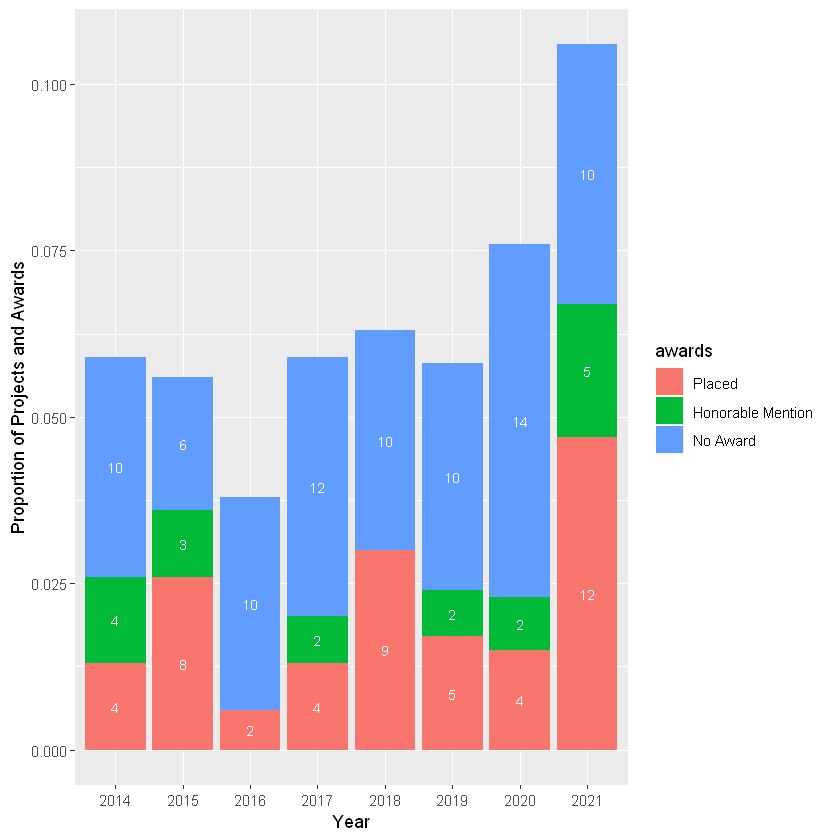

In [41]:
# 9. bar plot of number of Infectious Disease projects by year (x-axis) :show Chi sq test of homogeniety
tab <- table(projDat[, c("Year","InfectiousDiseases_Covid")])
perc <- as.data.frame(round(tab/apply(tab,1, sum), 2))

dim(tab)
sum(tab)


t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
t <- t[which(t[,2] == 1), c(1,3,4)]
colnames(t) <- c("Year", "NumOfProjects", "percentage")
t
chisq.test(t[,2])

years <- projDat$Year[projDat$InfectiousDiseases_Covid == 1]
awards <- projDat$award2[projDat$InfectiousDiseases_Covid == 1]
awards <- factor(awards)

plot.df <- data.frame(years, awards)
plot.df$awards <- factor(plot.df$awards, levels=c("Placed", "Honorable Mention", "No Award", "award", "HM", "noAward"))
plot.df$awards[which(plot.df$awards == "award")] <- "Placed"
plot.df$awards[which(plot.df$awards == "HM")] <- "Honorable Mention"
plot.df$awards[which(plot.df$awards == "noAward")] <- "No Award"
plot.df <- plot.df %>% group_by(years, awards) %>% tally()
plot.df$freq <- plot.df$n

totalparticipants <- as.data.frame.table(table(projDat$Year))
for(row in 1:length(rownames(plot.df))) {
    plot.df$n[row] <- round(plot.df$n[row]/totalparticipants$Freq[which(totalparticipants$Var1 == plot.df$years[row])],3)
}

ggplot(plot.df, aes(fill=awards, y=n, x=years)) + 
  geom_bar(position= position_stack(reverse = TRUE), stat="identity") + 
  labs(x = "Year", y = "Number Of Projects") +
  geom_text(aes(label=freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3) + 
  # labs(title = "Frequency and Awards of Infectious Disease Projects Over Time", caption = "Frequencies Shown in bar")
  labs(x = "Year", y = "Proportion of Projects and Awards")

                     
                      award  HM noAward
  BehavioralAndSocial    31  19      88
  biology               231  84     504
  Chemistry              24  15     133
  ComputerSci            58  28      92
  Engineering           107  57     372
  environment           108  52     236
  Math                   15   3      28
  Physics                12   4      45

[1] 8 3

[1] 2346


	Pearson's Chi-squared test

data:  tab
X-squared = 47.903, df = 14, p-value = 1.364e-05


ProjectField,award,Freq,percentage
Social/Psych,Placed,31,0.22464
Biology,Placed,231,0.28205
Chemistry,Placed,24,0.13953
ComputerSci,Placed,58,0.32584
Engineering,Placed,107,0.19963
Environment,Placed,108,0.27273
Math,Placed,15,0.32609
Physics,Placed,12,0.19672
Social/Psych,Honorable Mention,19,0.13768
Biology,Honorable Mention,84,0.10256


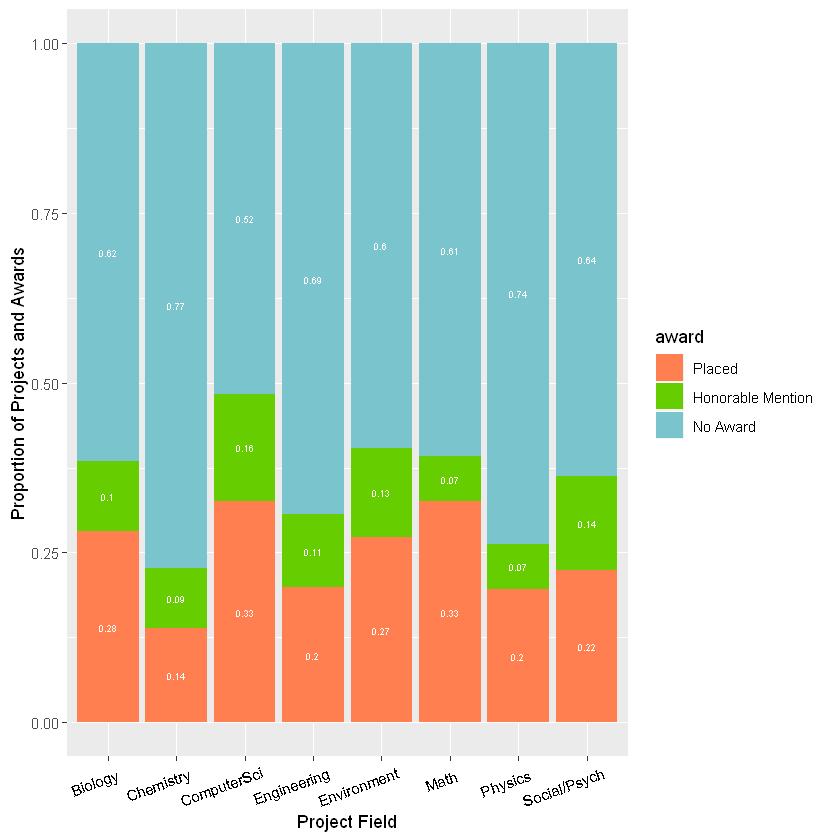

In [63]:
# 10. bar plot of number of projects by category (x-axis) and stacked by award (1,2,3) or no-award (HM and NA)

tab <- table(projDat$ProjectField, projDat$award2)
tab
dim(tab)
sum(tab)
chisq.test(tab)
t <- as.data.frame(tab)
perc <- round(tab/apply(tab, 1, sum),5)
perc <- as.data.frame(perc)
t <- cbind(t,perc[,3])
colnames(t) <- c("ProjectField", "award", "Freq", "percentage")
t$ProjectField <- factor(t$ProjectField, levels=c("Biology", "Chemistry", "ComputerSci", "Engineering", "Environment", "Math", "Physics", "Social/Psych", "environment", "BehavioralAndSocial", "biology"))
t$ProjectField[which(t$ProjectField == "BehavioralAndSocial")] <- "Social/Psych"
t$ProjectField[which(t$ProjectField == "biology")] <- "Biology"
t$ProjectField[which(t$ProjectField == "environment")] <- "Environment"

t$award <- factor(t$award, levels=c("Placed", "Honorable Mention", "No Award", "award", "HM", "noAward"))
t$award[which(t$award == "award")] <- "Placed"
t$award[which(t$award == "HM")] <- "Honorable Mention"
t$award[which(t$award == "noAward")] <- "No Award"

g <- ggplot(data = t, aes(x = ProjectField , y = percentage, fill = award))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + scale_fill_manual(values = colors4plots[1:10])
g <- g + geom_text(aes(label=round(percentage, 2)), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 2)
# g <- g + labs(title = "Field of research and Awards", caption = "Fig 1.0: Percentages Shown in bar")
g <- g + theme(axis.text.x=element_text(color = "black", size=9, angle=20, vjust=.8, hjust=0.8))
g <- g + labs(x = "Project Field", y = "Proportion of Projects and Awards")
g


      award2
Cancer award   HM noAward
     0   560  257    1467
     1    26    5      31

[1] 2346

      award2
Cancer award   HM noAward
     0  0.25 0.11    0.64
     1  0.42 0.08    0.50


	Pearson's Chi-squared test

data:  tab
X-squared = 9.7939, df = 2, p-value = 0.007469


Cancer,award,Freq,percentage
0,Placed,560,0.25
1,Placed,26,0.42
0,Honorable Mention,257,0.11
1,Honorable Mention,5,0.08
0,No Award,1467,0.64
1,No Award,31,0.50


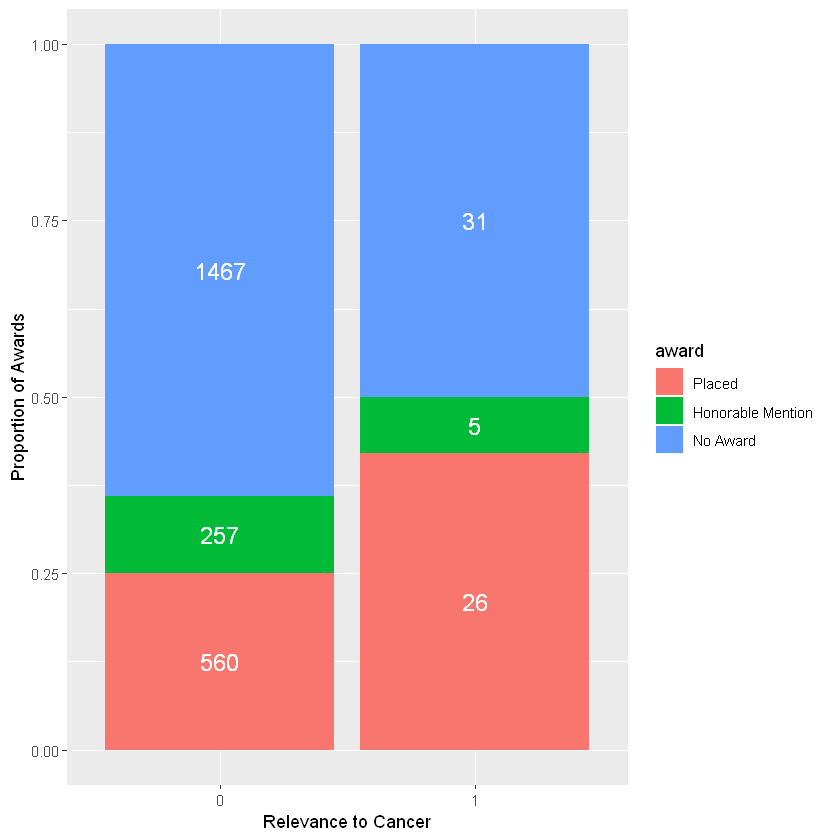

In [65]:
# 11. bar plot of number of projects by cancer vs non, (x-axis) stacked by award or no award. :test of proportions
tab <- table(projDat[, c("Cancer", "award2")])
tab
sum(tab)
perc <- round(tab/apply(tab,1, sum), 2)
perc
chisq.test(tab)
perc <- as.data.frame(perc)
t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
colnames(t) <- c("Cancer", "award", "Freq", "percentage")

t$award <- factor(t$award, levels=c("Placed", "Honorable Mention", "No Award", "award", "HM", "noAward"))
t$award[which(t$award == "award")] <- "Placed"
t$award[which(t$award == "HM")] <- "Honorable Mention"
t$award[which(t$award == "noAward")] <- "No Award"

g <- ggplot(data = t, aes(x = Cancer, y = percentage, fill = award))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + geom_text(aes(label=Freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 5)
# g <- g + labs(title = "Number of Projects Cancer related", caption = "Fig 1.0: Percentages Shown in bar")
g <- g + labs(x = "Relevance to Cancer", y = "Proportion of Awards")
g


     award2
AI_ML award   HM noAward
    0   560  248    1451
    1    26   14      47

     award2
AI_ML award   HM noAward
    0  0.25 0.11    0.64
    1  0.30 0.16    0.54


	Pearson's Chi-squared test

data:  tab
X-squared = 4.1996, df = 2, p-value = 0.1225


AI_ML,award,Freq,percentage
0,Placed,560,0.25
1,Placed,26,0.30
0,Honorable Mention,248,0.11
1,Honorable Mention,14,0.16
0,No Award,1451,0.64
1,No Award,47,0.54


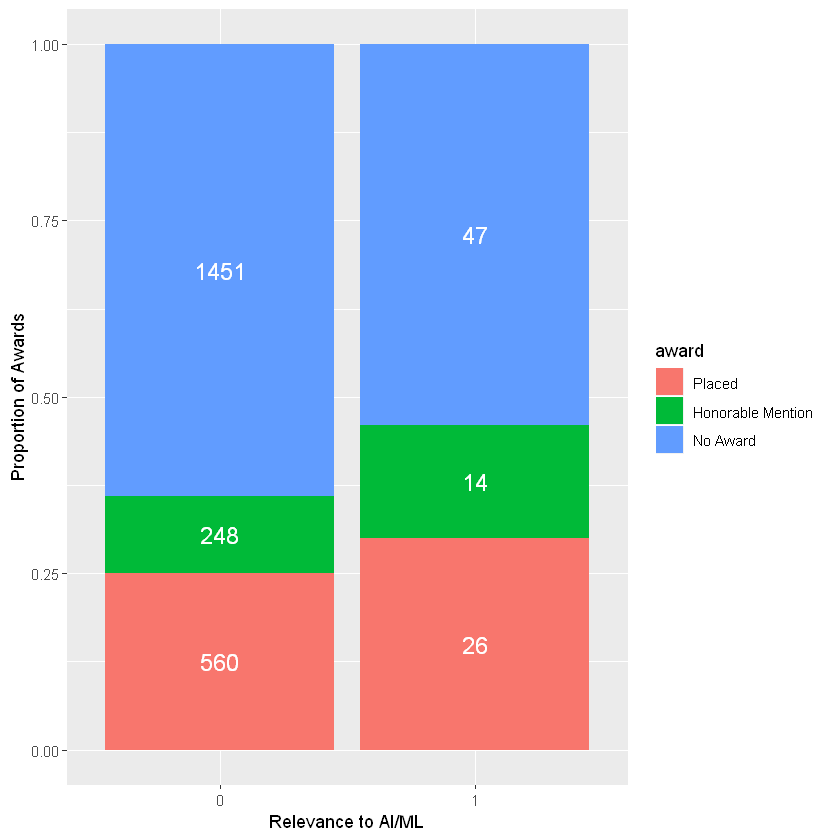

In [66]:
# 12. bar plot of number of projects by AI/ML vs non, (x-axis) stacked by award or no award.: test of proportions
tab <- table(projDat[, c("AI_ML", "award2")])
tab
perc <- round(tab/apply(tab,1, sum), 2)
perc
chisq.test(tab)
perc <- as.data.frame(perc)
t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
colnames(t) <- c("AI_ML", "award", "Freq", "percentage")

t$award <- factor(t$award, levels=c("Placed", "Honorable Mention", "No Award", "award", "HM", "noAward"))
t$award[which(t$award == "award")] <- "Placed"
t$award[which(t$award == "HM")] <- "Honorable Mention"
t$award[which(t$award == "noAward")] <- "No Award"
t

g <- ggplot(data = t, aes(x = AI_ML, y = percentage, fill = award))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + geom_text(aes(label=Freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 5)
# g <- g + labs(title = "Number of Projects AI/ML related", caption = "Fig 1.0: Percentages Shown in bar")
g <- g + labs(x = "Relevance to AI/ML", y = "Proportion of Awards")
g


                        award2
InfectiousDiseases_Covid award   HM noAward
                       0   538  244    1416
                       1    48   18      82

                        award2
InfectiousDiseases_Covid award   HM noAward
                       0  0.24 0.11    0.64
                       1  0.32 0.12    0.55


	Pearson's Chi-squared test

data:  tab
X-squared = 5.4189, df = 2, p-value = 0.06657


InfectiousDiseases_Covid,award,Freq,percentage
0,award,538,0.24
1,award,48,0.32
0,HM,244,0.11
1,HM,18,0.12
0,noAward,1416,0.64
1,noAward,82,0.55


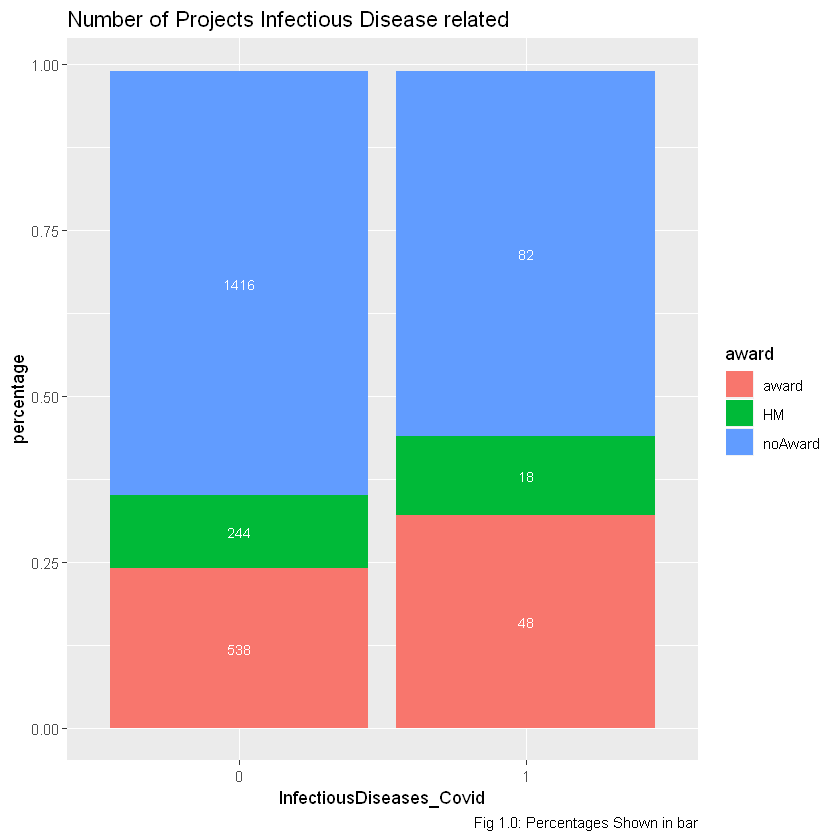

In [13]:
# 13. bar plot of number of projects by Infectious Diseases vs non, (x-axis) stacked by award or no award.: test of proportions
tab <- table(projDat[, c("InfectiousDiseases_Covid", "award2")])
tab
perc <- round(tab/apply(tab,1, sum), 2)
perc
chisq.test(tab)
perc <- as.data.frame(perc)
t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
colnames(t) <- c("InfectiousDiseases_Covid", "award", "Freq", "percentage")
t

g <- ggplot(data = t, aes(x = InfectiousDiseases_Covid, y = percentage, fill = award))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + geom_text(aes(label=Freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
g <- g + labs(title = "Number of Projects Infectious Disease related", caption = "Fig 1.0: Percentages Shown in bar")
g


          award2
GenderComp award  HM noAward
      AllF   237 108     692
      AllM   240  79     490
      Mix     15  10      54
      X       94  65     262

          award2
GenderComp award   HM noAward
      AllF  0.23 0.10    0.67
      AllM  0.30 0.10    0.61
      Mix   0.19 0.13    0.68
      X     0.22 0.15    0.62


	Pearson's Chi-squared test

data:  tab
X-squared = 23.433, df = 6, p-value = 0.0006637


GenderComp,award,Freq,percentage
AllF,award,237,0.23
AllM,award,240,0.30
Mix,award,15,0.19
X,award,94,0.22
AllF,HM,108,0.10
AllM,HM,79,0.10
Mix,HM,10,0.13
X,HM,65,0.15
AllF,noAward,692,0.67
AllM,noAward,490,0.61


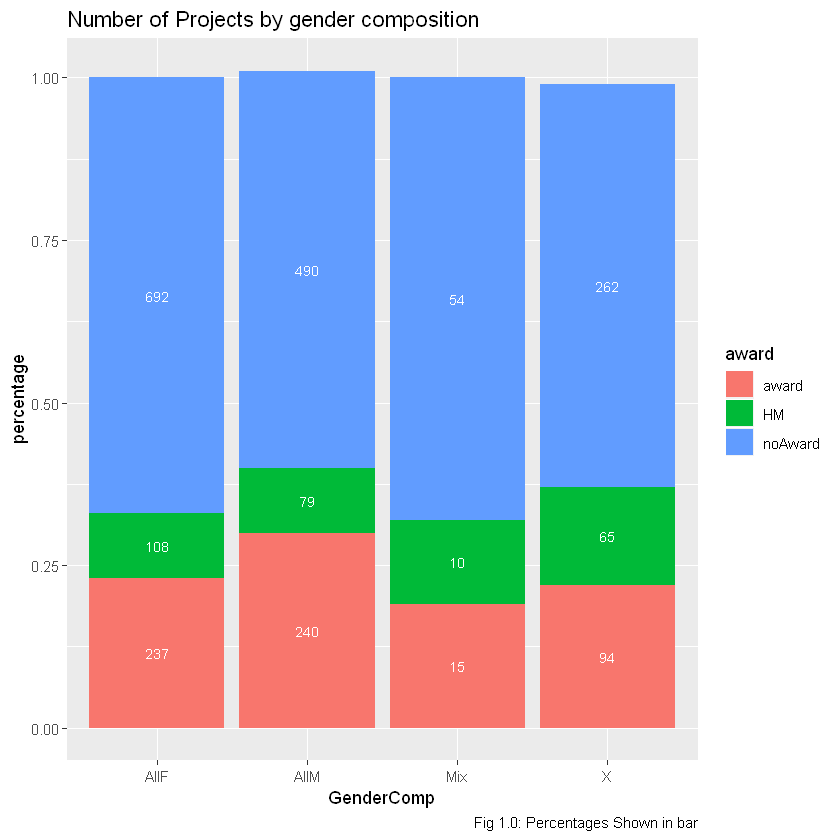

In [14]:
# 14. bar plot of number of projects by Gender comp, (x-axis) stacked by award or no award.: test of proportions

tab <- table(projDat[, c("GenderComp", "award2")])
tab
perc <- round(tab/apply(tab,1, sum), 2)
perc
chisq.test(tab)
perc <- as.data.frame(perc)
t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
colnames(t) <- c("GenderComp", "award", "Freq", "percentage")
t

g <- ggplot(data = t, aes(x = GenderComp, y = percentage, fill = award))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + geom_text(aes(label=Freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
g <- g + labs(title = "Award vs gender composition", caption = "Fig 1.0: Percentages Shown in bar")
g


    
     award  HM noAward
  9     64  38     264
  10   145  77     505
  11   252 117     368
  12   125  30     201

[1] 2186

    
       award      HM noAward
  9  0.17486 0.10383 0.72131
  10 0.19945 0.10591 0.69464
  11 0.34193 0.15875 0.49932
  12 0.35112 0.08427 0.56461


	Pearson's Chi-squared test

data:  tab
X-squared = 95.667, df = 6, p-value < 2.2e-16


AvgGrade,award,Freq,percentage
9,Placed,64,0.17486
10,Placed,145,0.19945
11,Placed,252,0.34193
12,Placed,125,0.35112
9,Honorable Mention,38,0.10383
10,Honorable Mention,77,0.10591
11,Honorable Mention,117,0.15875
12,Honorable Mention,30,0.08427
9,No Award,264,0.72131
10,No Award,505,0.69464


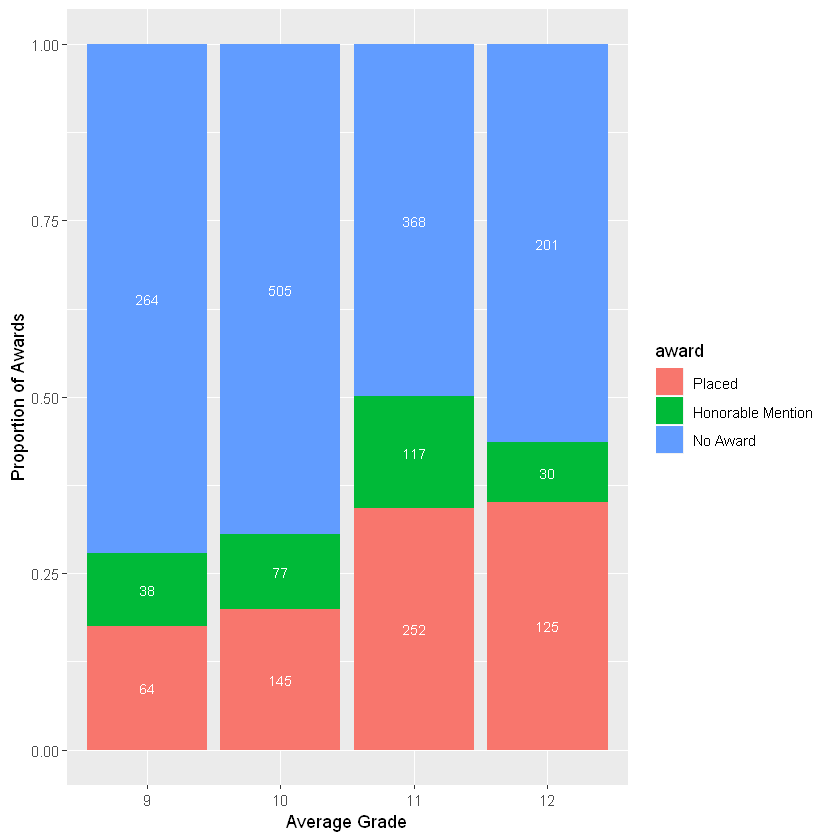

In [57]:
# 15. bar plot of number of projects by grade Comp, (x-axis) stacked by award or no award.: show Chi sq test of homogeniety

tab <- table(round(projDat$AvgGrade,0), projDat$award2)
# tab <- table(projDat[, c("AvgGrade", "award2")])
tab

sum(tab)
perc <- round(tab/apply(tab,1, sum), 5)
perc
chisq.test(tab)
perc <- as.data.frame(perc)
t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
colnames(t) <- c("AvgGrade", "award", "Freq", "percentage")

t$award <- factor(t$award, levels=c("Placed", "Honorable Mention", "No Award", "award", "HM", "noAward"))
t$award[which(t$award == "award")] <- "Placed"
t$award[which(t$award == "HM")] <- "Honorable Mention"
t$award[which(t$award == "noAward")] <- "No Award"
t

g <- ggplot(data = t, aes(x = AvgGrade, y = percentage, fill = award))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + geom_text(aes(label=Freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
# g <- g + labs(title = "Award vs grade", caption = "Fig 1.0: Percentages Shown in bar")
g <- g + labs(x = "Average Grade", y = "Proportion of Awards")
g

       
valcons award  HM noAward
      1   253 121     902
      2   266 112     522
      3    65  29      69

[1] 2339

       
valcons award   HM noAward
      1  0.20 0.09    0.71
      2  0.30 0.12    0.58
      3  0.40 0.18    0.42


	Pearson's Chi-squared test

data:  tab
X-squared = 72.529, df = 4, p-value = 6.634e-15


AppliedVal,award,Freq,percentage
1,Placed,253,0.20
2,Placed,266,0.30
3,Placed,65,0.40
1,Honorable Mention,121,0.09
2,Honorable Mention,112,0.12
3,Honorable Mention,29,0.18
1,No Award,902,0.71
2,No Award,522,0.58
3,No Award,69,0.42


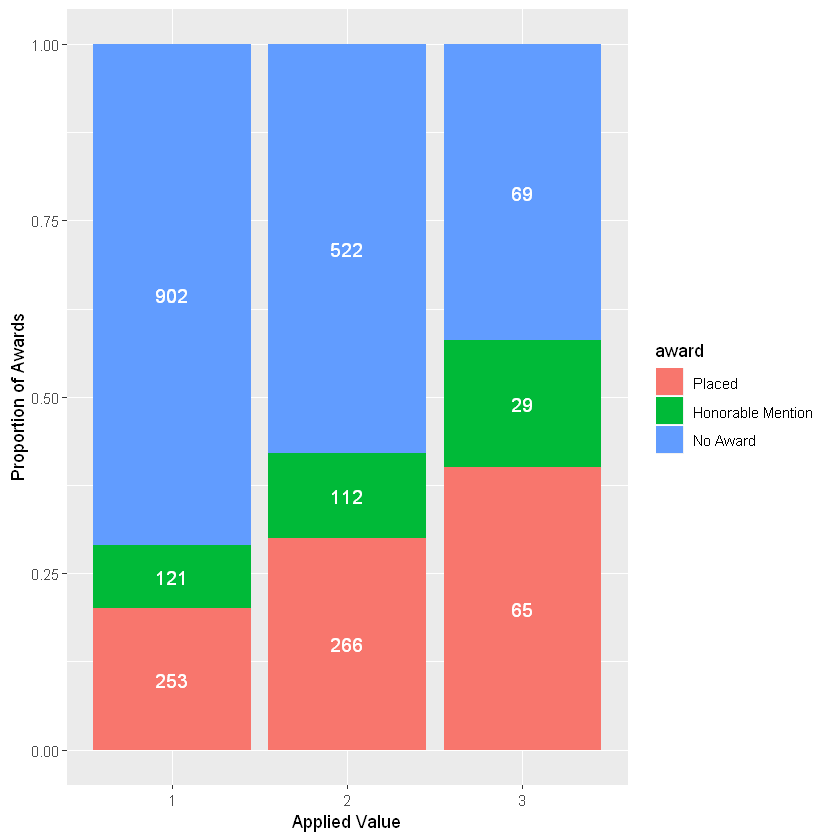

In [67]:
# 16.1 Plot of applied Value vs Award

valcons <- round(projDat$AppliedValue,0)
valcons[valcons < 4] <- 1
valcons[valcons > 6] <- 3
valcons[valcons > 3] <- 2

tab <- table(valcons, projDat$award2)
tab
sum(tab)
perc <- round(tab/apply(tab,1, sum), 2)
perc
chisq.test(tab)
perc <- as.data.frame(perc)
t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
colnames(t) <- c("AppliedVal", "award", "Freq", "percentage")

t$award <- factor(t$award, levels=c("Placed", "Honorable Mention", "No Award", "award", "HM", "noAward"))
t$award[which(t$award == "award")] <- "Placed"
t$award[which(t$award == "HM")] <- "Honorable Mention"
t$award[which(t$award == "noAward")] <- "No Award"
t

g <- ggplot(data = t, aes(x = AppliedVal, y = percentage, fill = award))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + geom_text(aes(label=Freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 4)
# g <- g + labs(title = "Applied Value vs Award", caption = "Frequencies Shown in bar")
g <- g + labs(x = "Applied Value", y = "Proportion of Awards")
g

               award2
EthnicityComp   award  HM noAward
  AllAsian         97  33     217
  AllBiracial       6   0      12
  AllBlack         11   5      63
  AllLatino         9   3      61
  AllSouthAsian    88  22     117
  AllWhite        210 108     559

[1] 1621

               award2
EthnicityComp   award   HM noAward
  AllAsian       0.28 0.10    0.63
  AllBiracial    0.33 0.00    0.67
  AllBlack       0.14 0.06    0.80
  AllLatino      0.12 0.04    0.84
  AllSouthAsian  0.39 0.10    0.52
  AllWhite       0.24 0.12    0.64

Warning message in chisq.test(tab):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  tab
X-squared = 48.563, df = 10, p-value = 4.897e-07


EthnicityComp,award,Freq,percentage
AllAsian,award,97,0.28
AllBiracial,award,6,0.33
AllBlack,award,11,0.14
AllLatino,award,9,0.12
AllSouthAsian,award,88,0.39
AllWhite,award,210,0.24
AllAsian,HM,33,0.10
AllBiracial,HM,0,0.00
AllBlack,HM,5,0.06
AllLatino,HM,3,0.04


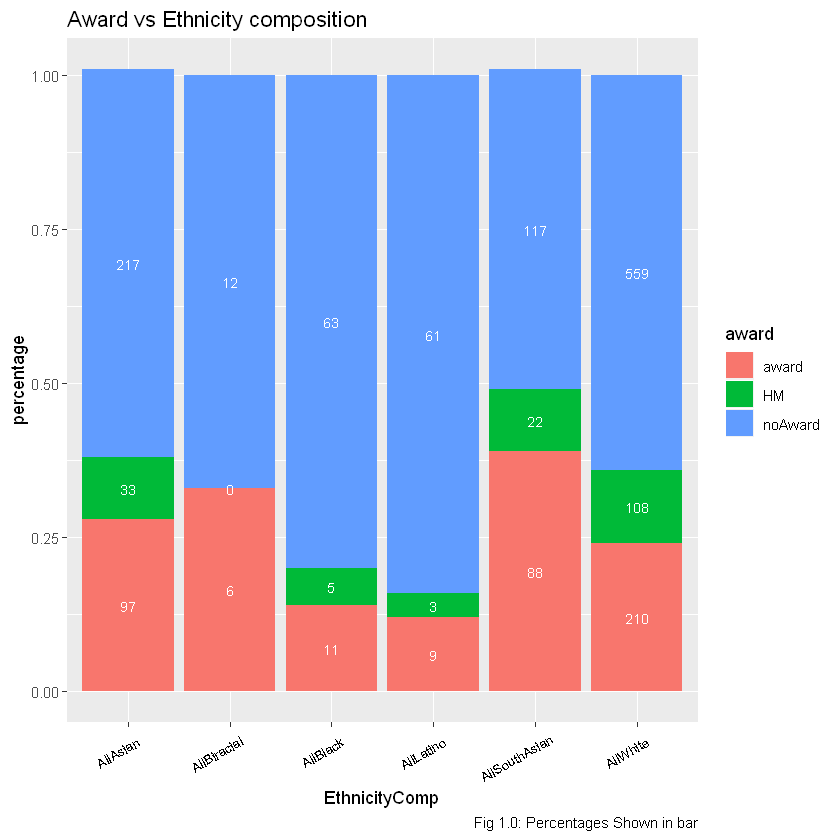

In [23]:
# 16. bar plot of number of projects by Ethnicity Comp, (x-axis) stacked by award or no award. :show Chi sq test of homogeniety

tab <- table(projDat[, c("EthnicityComp", "award2")])
tab <- tab[4:9,]
tab

sum(tab)
perc <- round(tab/apply(tab,1, sum), 2)
perc
chisq.test(tab)
perc <- as.data.frame(perc)
t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
colnames(t) <- c("EthnicityComp", "award", "Freq", "percentage")
t

g <- ggplot(data = t, aes(x = EthnicityComp, y = percentage, fill = award))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + geom_text(aes(label=Freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
g <- g + labs(title = "Award vs Ethnicity composition", caption = "Fig 1.0: Percentages Shown in bar")
g <- g + theme(axis.text.x=element_text(color = "black", size=8, angle=30, vjust=.8, hjust=0.8))
g

       
valcons award   HM noAward
      1   471  213    1171
      2    98   44     258
      3    17    5      69

[1] 2346

       
valcons award   HM noAward
      1  0.25 0.11    0.63
      2  0.24 0.11    0.64
      3  0.19 0.05    0.76


	Pearson's Chi-squared test

data:  tab
X-squared = 6.6266, df = 4, p-value = 0.157


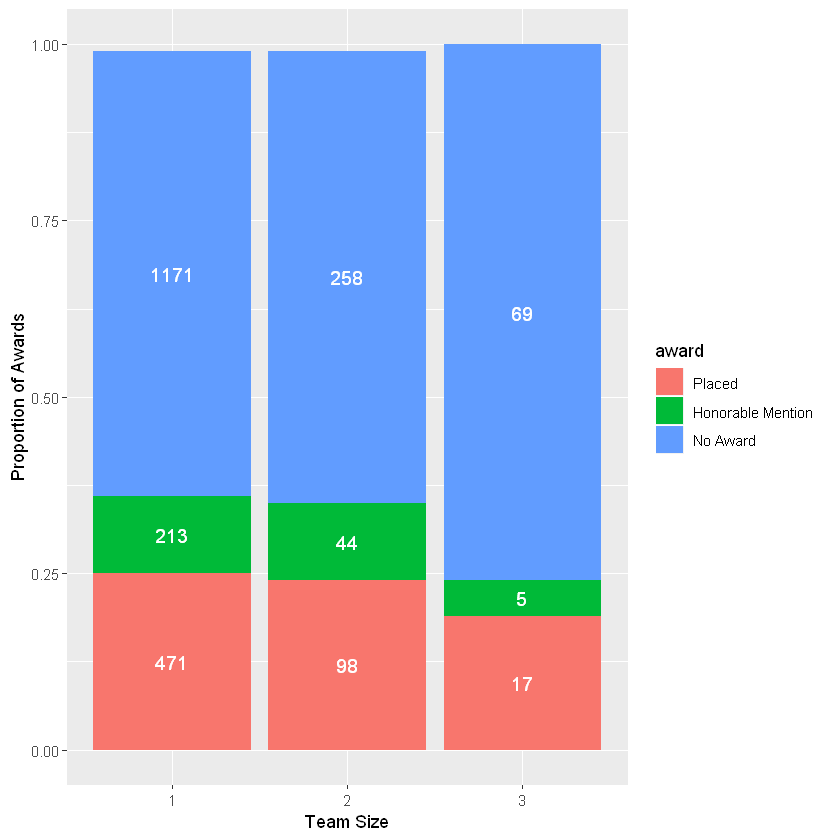

In [69]:
# 16.2 Plot of team size vs Award

valcons <- round(as.numeric(projDat$team_size),0)

tab <- table(valcons, projDat$award2)
tab
sum(tab)
perc <- round(tab/apply(tab,1, sum), 2)
perc
chisq.test(tab)
perc <- as.data.frame(perc)
t <- as.data.frame(tab)
t <- cbind(t, perc[,3])
colnames(t) <- c("TeamSize", "award", "Freq", "percentage")

t$award <- factor(t$award, levels=c("Placed", "Honorable Mention", "No Award", "award", "HM", "noAward"))
t$award[which(t$award == "award")] <- "Placed"
t$award[which(t$award == "HM")] <- "Honorable Mention"
t$award[which(t$award == "noAward")] <- "No Award"

g <- ggplot(data = t, aes(x = TeamSize, y = percentage, fill = award))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + geom_text(aes(label=Freq), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 4)
# g <- g + labs(title = "Team Size vs Award", caption = "Frequencies Shown in bar")
g <- g + labs(x = "Team Size", y = "Proportion of Awards")
g

In [ ]:
# 17. bar plot of number of schools participating by year (x-axis), stacked by private/public schools.

tab <- table(dat[,c("Year", "grade")])
tab
chisq.test(table(dat[,c("Year", "grade")])[c(1:7),c(1:4)])
#barplot(table(dat[,c("grade", "Year")]), legend = T)

t <- as.data.frame(tab)
#t
perc <- as.data.frame(round(tab/apply(tab, 1, sum),2))
t <- cbind(t,perc[,3])
t$grade <- as.character(t$grade)
t$grade[which(t$grade == "9th")] = "09th"
colnames(t)[4] <- "percentage"

g <- ggplot(data = t, aes(x = Year, y = Freq, fill = grade))
g <- g + geom_bar(stat = "identity", position = position_stack(reverse=TRUE))
g <- g + scale_fill_manual(values = colorsGray[c(6,7,4,3,2)])
g <- g + geom_text(aes(label=percentage), position = position_stack(vjust=0.5, reverse = TRUE),colour = "white", size = 3)
g <- g + labs(title = "Student Participation in Science Fair By Grade", caption = "Fig 1.0: Percentages Shown in bar")
g

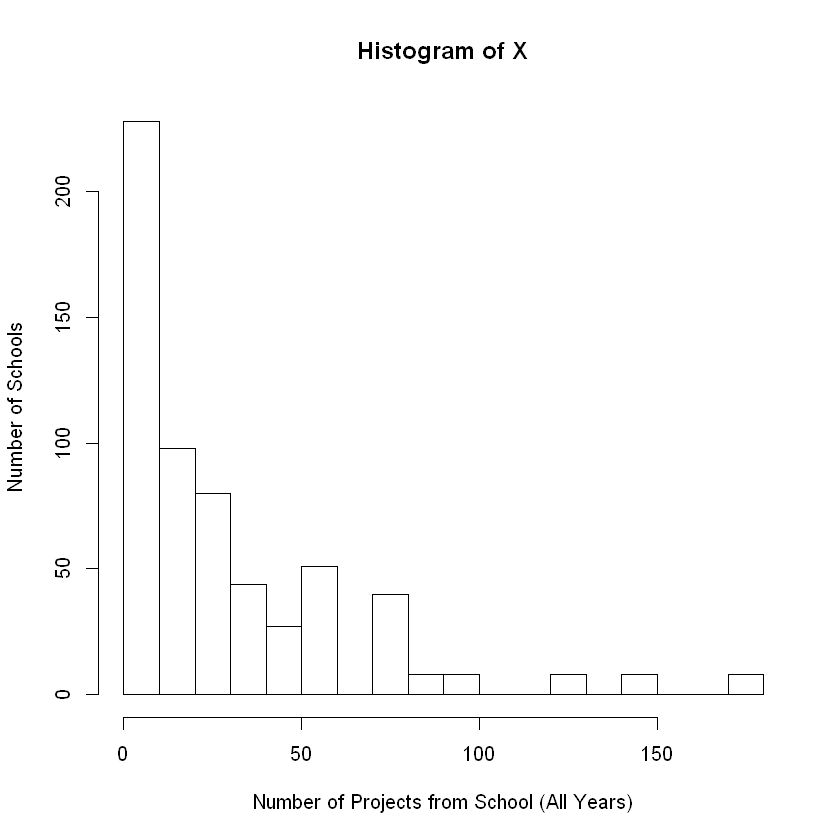

In [71]:
# 18. histogram of the number of projects (binned 0-2, 2-5, 5-10, 10-15, 15-20, 20+) from each school (x-axis), and the number of schools... i.e most schools would have 2-3 projects, few schools would have 10-15 entries.
X <- as.numeric(schoolDat$TotalProjectFromSchoolAllYears)
X <- X[!is.na(X)]
h <- hist(X, breaks = 16, xlab='Number of Projects from School (All Years)', ylab='Number of Schools')

# lines(density(X), col="blue", lwd=2)

[1] 614   2

Warning message:
"Removed 192 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 192 rows containing missing values (geom_point)."

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.0304790,0.7226024,-1.426067,1.545920e-01
V1,0.5549566,0.1028842,5.393990,1.153055e-07


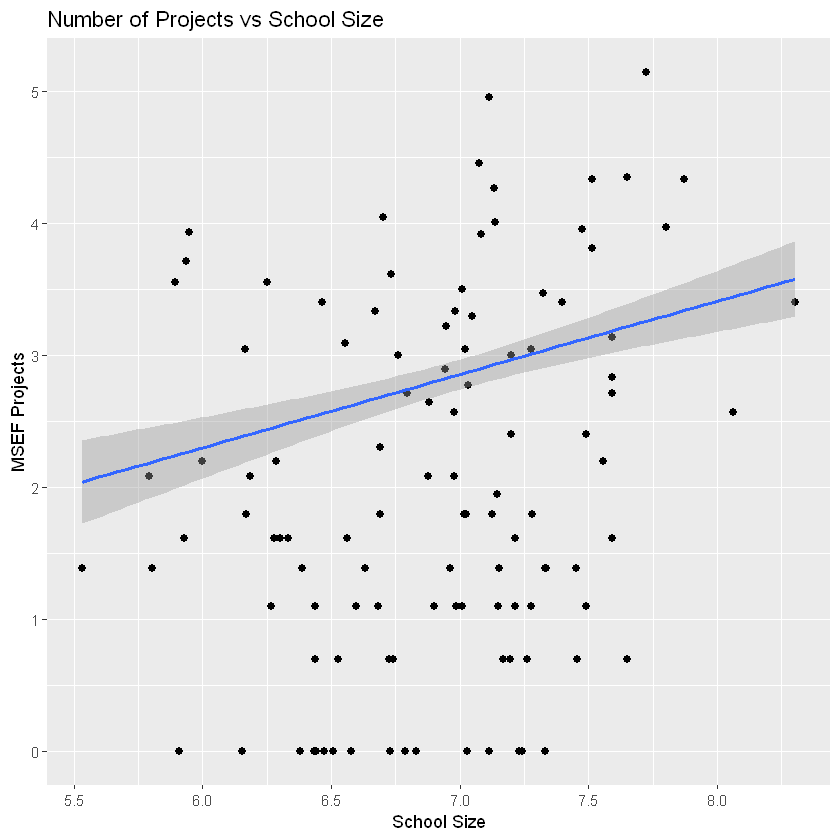

In [33]:
# 19. scatterplot of school participation (# of projects) vs student size

plot.df <- as.data.frame(cbind(log(schoolDat$NumStudents), log(schoolDat$TotalProjectFromSchoolAllYears)))
dim(plot.df)
ggplot(plot.df, aes(x=V1, y=V2)) +
  geom_point(size=2) +
  geom_smooth(method=lm) + #,se=FALSE
  ggtitle("Number of Projects vs School Size") +
  labs(x = "School Size", y = "MSEF Projects")
  # geom_text(x = 10, y = 1000, label = lm_eqn(plot.df), parse = TRUE)

linear_model <- lm(V2 ~ V1, data = plot.df)
summary(linear_model)$coefficients

Warning message:
"Removed 192 rows containing missing values (geom_point)."

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),34.5141816520,4.1157122158,8.3859560,7.702708e-16
V1,-0.0002021174,0.0002469714,-0.8183839,4.136021e-01


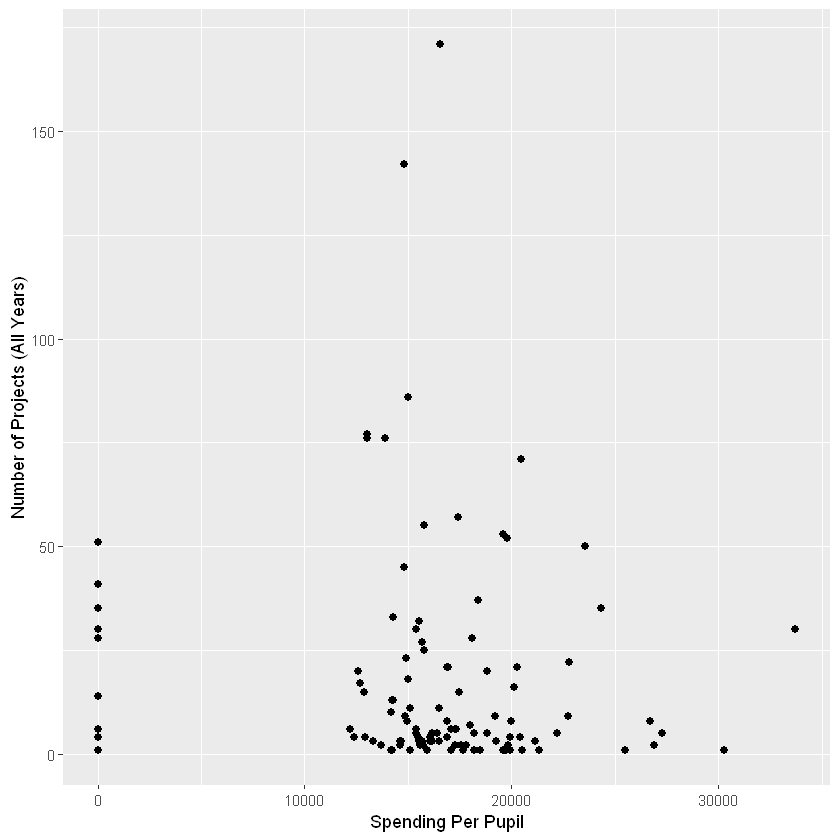

In [13]:
# 20. scatterplot of school participation (# of projects) vs funding

plot.df <- as.data.frame(cbind(schoolDat$SpendingPerPupil, schoolDat$TotalProjectFromSchoolAllYears))

ggplot(plot.df, aes(x=V1, y=V2)) +
  geom_point(size=2) +
  # ggtitle("Number of Projects vs Funding") +
  labs(x = "Spending Per Pupil", y = "Number of Projects (All Years)")
  # geom_text(x = 10, y = 1000, label = lm_eqn(plot.df), parse = TRUE)

linear_model <- lm(V2 ~ V1, data = plot.df)
summary(linear_model)$coefficients

In [ ]:
plot.df <- as.data.frame(cbind(schoolDat$SpendingPerPupil, schoolDat$TotalProjectFromSchoolAllYears))

ggplot(plot.df, aes(x=V1, y=V2)) +
  geom_point(size=2) +
  ggtitle("Number of Projects vs Funding") +
  labs(x = "Spending", y = "Projects")
  # geom_text(x = 10, y = 1000, label = lm_eqn(plot.df), parse = TRUE)

linear_model <- lm(V2 ~ V1, data = plot.df)
summary(linear_model)$coefficients

Warning message:
"Removed 192 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 192 rows containing missing values (geom_point)."Warning message in cor.test.default(x = plot.df$V1, y = plot.df$V2, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  plot.df$V1 and plot.df$V2
S = 10220732, p-value = 0.0001442
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1839847 


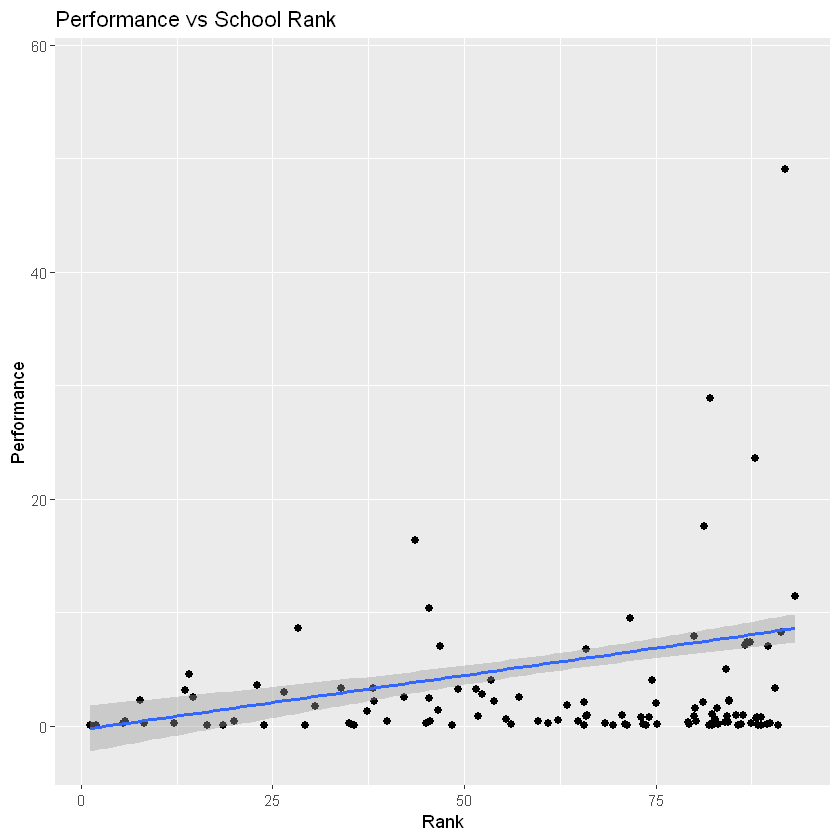

In [47]:
# 21. scatterplot of school participation vs school rank (2019 or 2018 or avg rank)

plot.df <- as.data.frame(cbind(schoolDat$Score2019, schoolDat$Total_awardValue))

ggplot(plot.df, aes(x=V1, y=V2)) +
  geom_point(size=2) +
  ggtitle("Performance vs School Rank") +
  geom_smooth(method=lm) + #,se=FALSE
  labs(x = "Rank", y = "Performance")

cor.test(x=plot.df$V1, y=plot.df$V2, method = 'spearman')

In [ ]:
# 22. scatterplot of school size vs performance score

